## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import mdtraj as md
from deeptime.decomposition import TICA
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
work_dir = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/'

import sys
sys.path.append('/Users/oskarsvensson/Science/FILES/NOTEBOOK/decomp_and_more/')
from integer_based_decomposition import int_decomp

with open('/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/Stuff/Ref.out', 'r') as Ref:
    lines = Ref.readlines()
    ref = lines[160]
    print(ref)
Ref.close()

      R          P(R)      ERROR



## Decomp

In [87]:
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/polystat.xvg'
H1Ree, H1Rg = np.genfromtxt(path, skip_header=28, usecols=(1, 2), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/polystat.xvg'
H3Ree, H3Rg = np.genfromtxt(path, skip_header=28, usecols=(1, 2), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/polystat.xvg'
H5Ree, H5Rg = np.genfromtxt(path, skip_header=28, usecols=(1, 2), unpack=True)

H1PS = (H1Ree**2)/(H1Rg**2)
H3PS = (H3Ree**2)/(H3Rg**2)
H5PS = (H5Ree**2)/(H5Rg**2)

H1Ree_ave = sum(H1Ree)/len(H1Ree)
H3Ree_ave = sum(H3Ree)/len(H3Ree)
H5Ree_ave = sum(H5Ree)/len(H5Ree)

H1Rg_ave = sum(H1Rg)/len(H1Rg)
H3Rg_ave = sum(H3Rg)/len(H3Rg)
H5Rg_ave = sum(H5Rg)/len(H5Rg)

H1PS_ave = sum(H1PS)/len(H1PS)
H3PS_ave = sum(H3PS)/len(H3PS)
H5PS_ave = sum(H5PS)/len(H5PS)

H1CP = []
alfa = 5
for rg, re, ps in zip(H1Rg, H1Ree, H1PS):
    conf = ((rg/H1Rg_ave) + (re/H1Ree_ave) + (ps/H1PS_ave))*alfa
    H1CP.append(int(conf))
H3CP = []
alfa = 5
for rg, re, ps in zip(H3Rg, H3Ree, H3PS):
    conf = ((rg/H3Rg_ave) + (re/H3Ree_ave) + (ps/H3PS_ave))*alfa
    H3CP.append(int(conf))
H5CP = []
alfa = 5
for rg, re, ps in zip(H5Rg, H5Ree, H5PS):
    conf = ((rg/H5Rg_ave) + (re/H5Ree_ave) + (ps/H5PS_ave))*alfa
    H5CP.append(int(conf))

In [16]:
int_decomp((H1Ree*10), work_dir)
int_decomp((H3Ree*10), work_dir)
int_decomp((H5Ree*10), work_dir)

Please input filename


 H1Ree


Please input filename


 H3Ree


Please input filename


 H5Ree


In [17]:
int_decomp((H1Rg*10), work_dir)
int_decomp((H3Rg*10), work_dir)
int_decomp((H5Rg*10), work_dir)

Please input filename


 H1Rg


Please input filename


 H3Rg


Please input filename


 H5Rg


In [19]:
int_decomp(H1PS, work_dir)
int_decomp(H3PS, work_dir)
int_decomp(H5PS, work_dir)

Please input filename


 H1PS


Please input filename


 H3PS


Please input filename


 H5PS


In [20]:
int_decomp(H1CP, work_dir)
int_decomp(H3CP, work_dir)
int_decomp(H5CP, work_dir)

Please input filename


 H1CP


Please input filename


 H3CP


Please input filename


 H5CP


In [88]:
def bar_plotter(X, Y, axis1, axis2):
    counter = 0
    for (x, y) in zip(X, Y):
        ax[axis1, axis2].bar(x, ((y/sum(Y))*100), color=color_list[counter], width=1.0)
        counter += 1

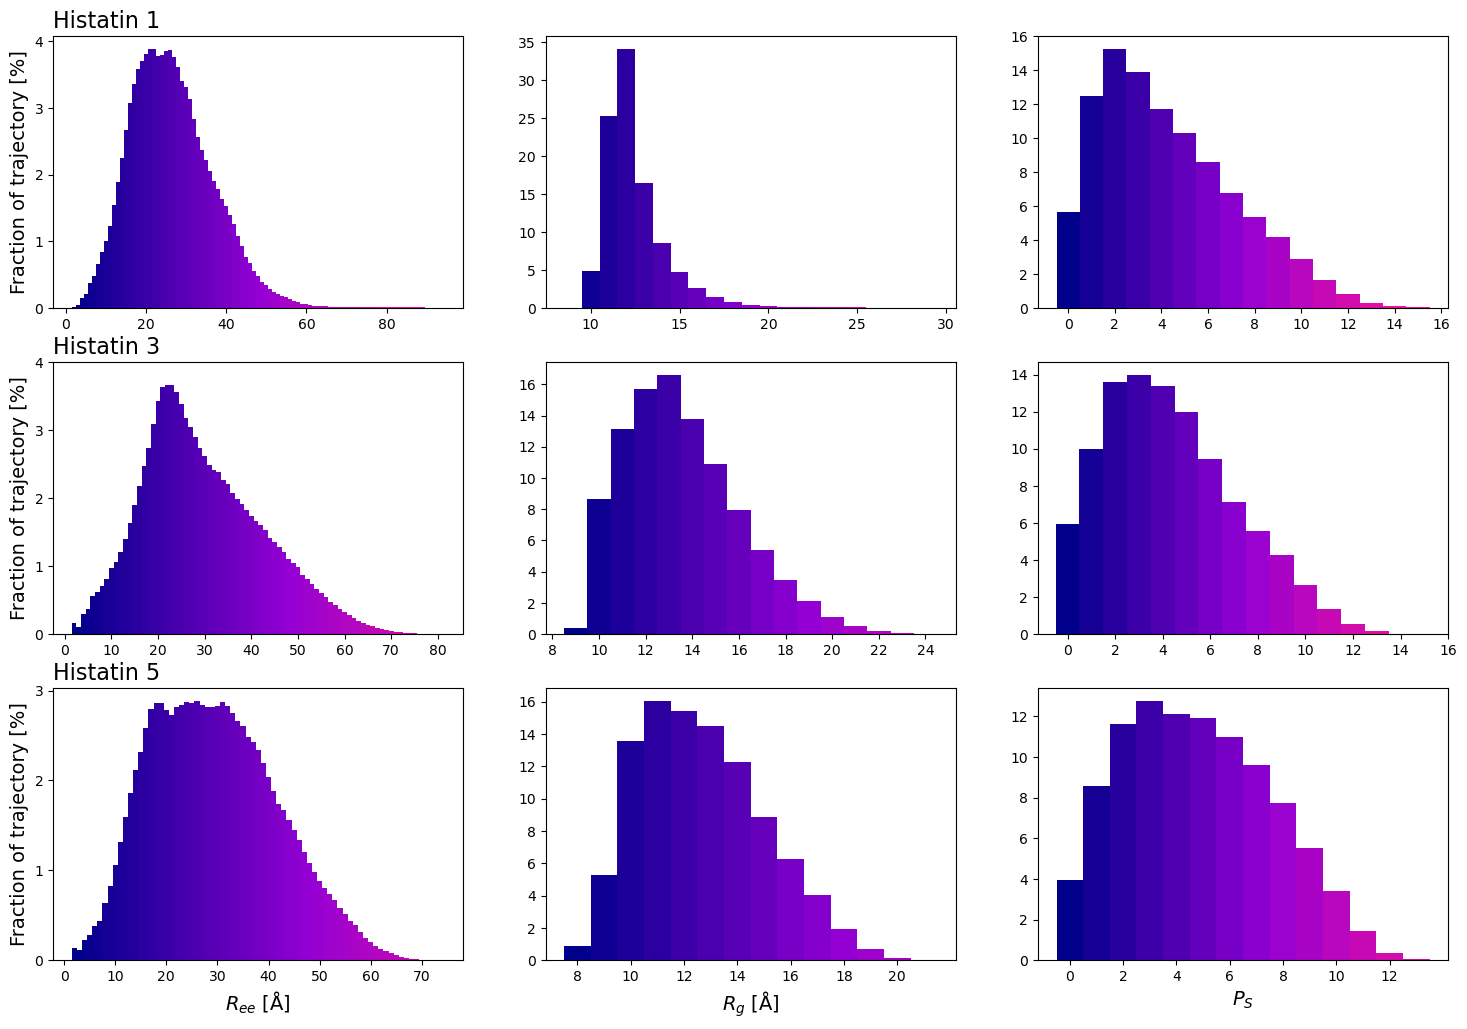

In [89]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18, 12))

colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 93
color_list = cmap(np.linspace(0, 1, amount))
grp1, dst1 = np.genfromtxt((work_dir + 'H1Ree_dist.dat'), usecols=(0, 1), unpack=True)
grp3, dst3 = np.genfromtxt((work_dir + 'H3Ree_dist.dat'), usecols=(0, 1), unpack=True)
grp5, dst5 = np.genfromtxt((work_dir + 'H5Ree_dist.dat'), usecols=(0, 1), unpack=True)
bar_plotter(grp1, dst1, 0, 0)
bar_plotter(grp3, dst3, 1, 0)
bar_plotter(grp5, dst5, 2, 0)

colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 21
color_list = cmap(np.linspace(0, 1, amount))
grp1, dst1 = np.genfromtxt((work_dir + 'H1Rg_dist.dat'), usecols=(0, 1), unpack=True)
grp3, dst3 = np.genfromtxt((work_dir + 'H3Rg_dist.dat'), usecols=(0, 1), unpack=True)
grp5, dst5 = np.genfromtxt((work_dir + 'H5Rg_dist.dat'), usecols=(0, 1), unpack=True)
bar_plotter(grp1, dst1, 0, 1)
bar_plotter(grp3, dst3, 1, 1)
bar_plotter(grp5, dst5, 2, 1)

colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 16
color_list = cmap(np.linspace(0, 1, amount))
grp1, dst1 = np.genfromtxt((work_dir + 'H1PS_dist.dat'), usecols=(0, 1), unpack=True)
grp3, dst3 = np.genfromtxt((work_dir + 'H3PS_dist.dat'), usecols=(0, 1), unpack=True)
grp5, dst5 = np.genfromtxt((work_dir + 'H5PS_dist.dat'), usecols=(0, 1), unpack=True)
bar_plotter(grp1, dst1, 0, 2)
bar_plotter(grp3, dst3, 1, 2)
bar_plotter(grp5, dst5, 2, 2)

#colors = ['darkblue', 'darkviolet', 'deeppink']
#cmap = LinearSegmentedColormap.from_list('mycmap', colors)
#amount = 36
#color_list = cmap(np.linspace(0, 1, amount))
#grp1, dst1 = np.genfromtxt((work_dir + 'H1CP_dist.dat'), usecols=(0, 1), unpack=True)
#grp3, dst3 = np.genfromtxt((work_dir + 'H3CP_dist.dat'), usecols=(0, 1), unpack=True)
#grp5, dst5 = np.genfromtxt((work_dir + 'H5CP_dist.dat'), usecols=(0, 1), unpack=True)
#bar_plotter(grp1, dst1, 0, 3)
#bar_plotter(grp3, dst3, 1, 3)
#bar_plotter(grp5, dst5, 2, 3)

ax[2, 2].set_xticks(range(0, 13, 2))
ax[1, 2].set_xticks(range(0, 18, 2))
ax[2, 1].set_xticks(range(8, 21, 2))
ax[1, 0].set_yticks(range(0, 5, 1))
ax[0, 2].set_yticks(range(0, 17, 2))
ax[2, 1].set_yticks(range(0, 17, 2))
ax[1, 1].set_yticks(range(0, 17, 2))
ax[0, 0].set_yticks(range(0, 5, 1))
ax[2, 0].set_yticks(range(0, 4, 1))

ax[0, 0].set_ylabel('Fraction of trajectory [%]', fontsize=14)
ax[1, 0].set_ylabel('Fraction of trajectory [%]', fontsize=14)
ax[2, 0].set_ylabel('Fraction of trajectory [%]', fontsize=14)

ax[0, 0].set_title('Histatin 1', fontsize=16, loc='left')
ax[1, 0].set_title('Histatin 3', fontsize=16, loc='left')
ax[2, 0].set_title('Histatin 5', fontsize=16, loc='left')

ax[2, 0].set_xlabel('$R_{ee}$ [Å]', fontsize=14)
ax[2, 1].set_xlabel('$R_{g}$ [Å]', fontsize=14)
ax[2, 2].set_xlabel('$P_{S}$', fontsize=14)
#ax[2, 3].set_xlabel('$X_{conf}$', fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hsts_decomp.png', bbox_inches='tight')

## DSSP

In [74]:
def dssp_func(path, length, grp, axis1, axis2, legend):
    SS_array = np.zeros((length, 9))
    SS_pro = []
    counter = 0
    while counter <= (length - 1):
        with open ((path + str(counter) + '.dat'), 'r') as dssp_file: 
            DSSP = dssp_file.readlines()
            for line in DSSP:
                for letter in line:
                    if letter == '~': # Loop
                        SS_array[counter, 0] += 1
                    elif letter == 'T': # Turn
                        SS_array[counter, 1] += 1
                    elif letter == 'S': # Bend
                        SS_array[counter, 2] += 1
                    elif letter == 'P': # PPII-helix
                        SS_array[counter, 3] += 1
                    elif letter == 'I': # Pi-helix
                        SS_array[counter, 4] += 1
                    elif letter == 'G': # 3-10-helix
                        SS_array[counter, 5] += 1
                    elif letter == 'E': # Beta-ladder
                        SS_array[counter, 6] += 1
                    elif letter == 'B': # Beta-bridge
                        SS_array[counter, 7] += 1
                    elif letter == 'H': #Alfa-helix
                        SS_array[counter, 8] += 1
            SS_pro.append((sum(SS_array[counter, 1:8])/sum(SS_array[counter]))*100)
        counter += 1
    
    counter1 = 0
    for array in SS_array:
        counter2 = 0
        temp = []
        for element in array:
            toup = (element, counter2)
            temp.append(toup)
            counter2 += 1
        temp.sort(reverse=True)
        for item in temp[1:8]:
            if item[1] == 1:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Turn', color='darkblue', width=1.0)
            elif item[1] == 2:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Bend', color='darkviolet', width=1.0)
            elif item[1] == 3:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='PPII-helix', color='deeppink', width=1.0)
            elif item[1] == 4:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Pi-helix', color='blue', width=1.0)
            elif item[1] == 5:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='3-10-helix', color='violet', width=1.0)
            elif item[1] == 6:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Beta-ladder', color='magenta', width=1.0)
            elif item[1] == 7:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Beta-bridge', color='slateblue', width=1.0)
            elif item[1] == 8:
                ax[axis1, axis2].bar(grp[counter1], (item[0]/sum(array))*100, label='Alpha-helix', color='indigo', width=1.0)
        if (legend == False) and (counter1 == 0):
            ax[axis1, axis2].legend(fontsize=18, loc='center left', bbox_to_anchor=(0.48, 1.13), 
                                    fancybox=True, shadow=False, ncols=7)
        counter1 += 1

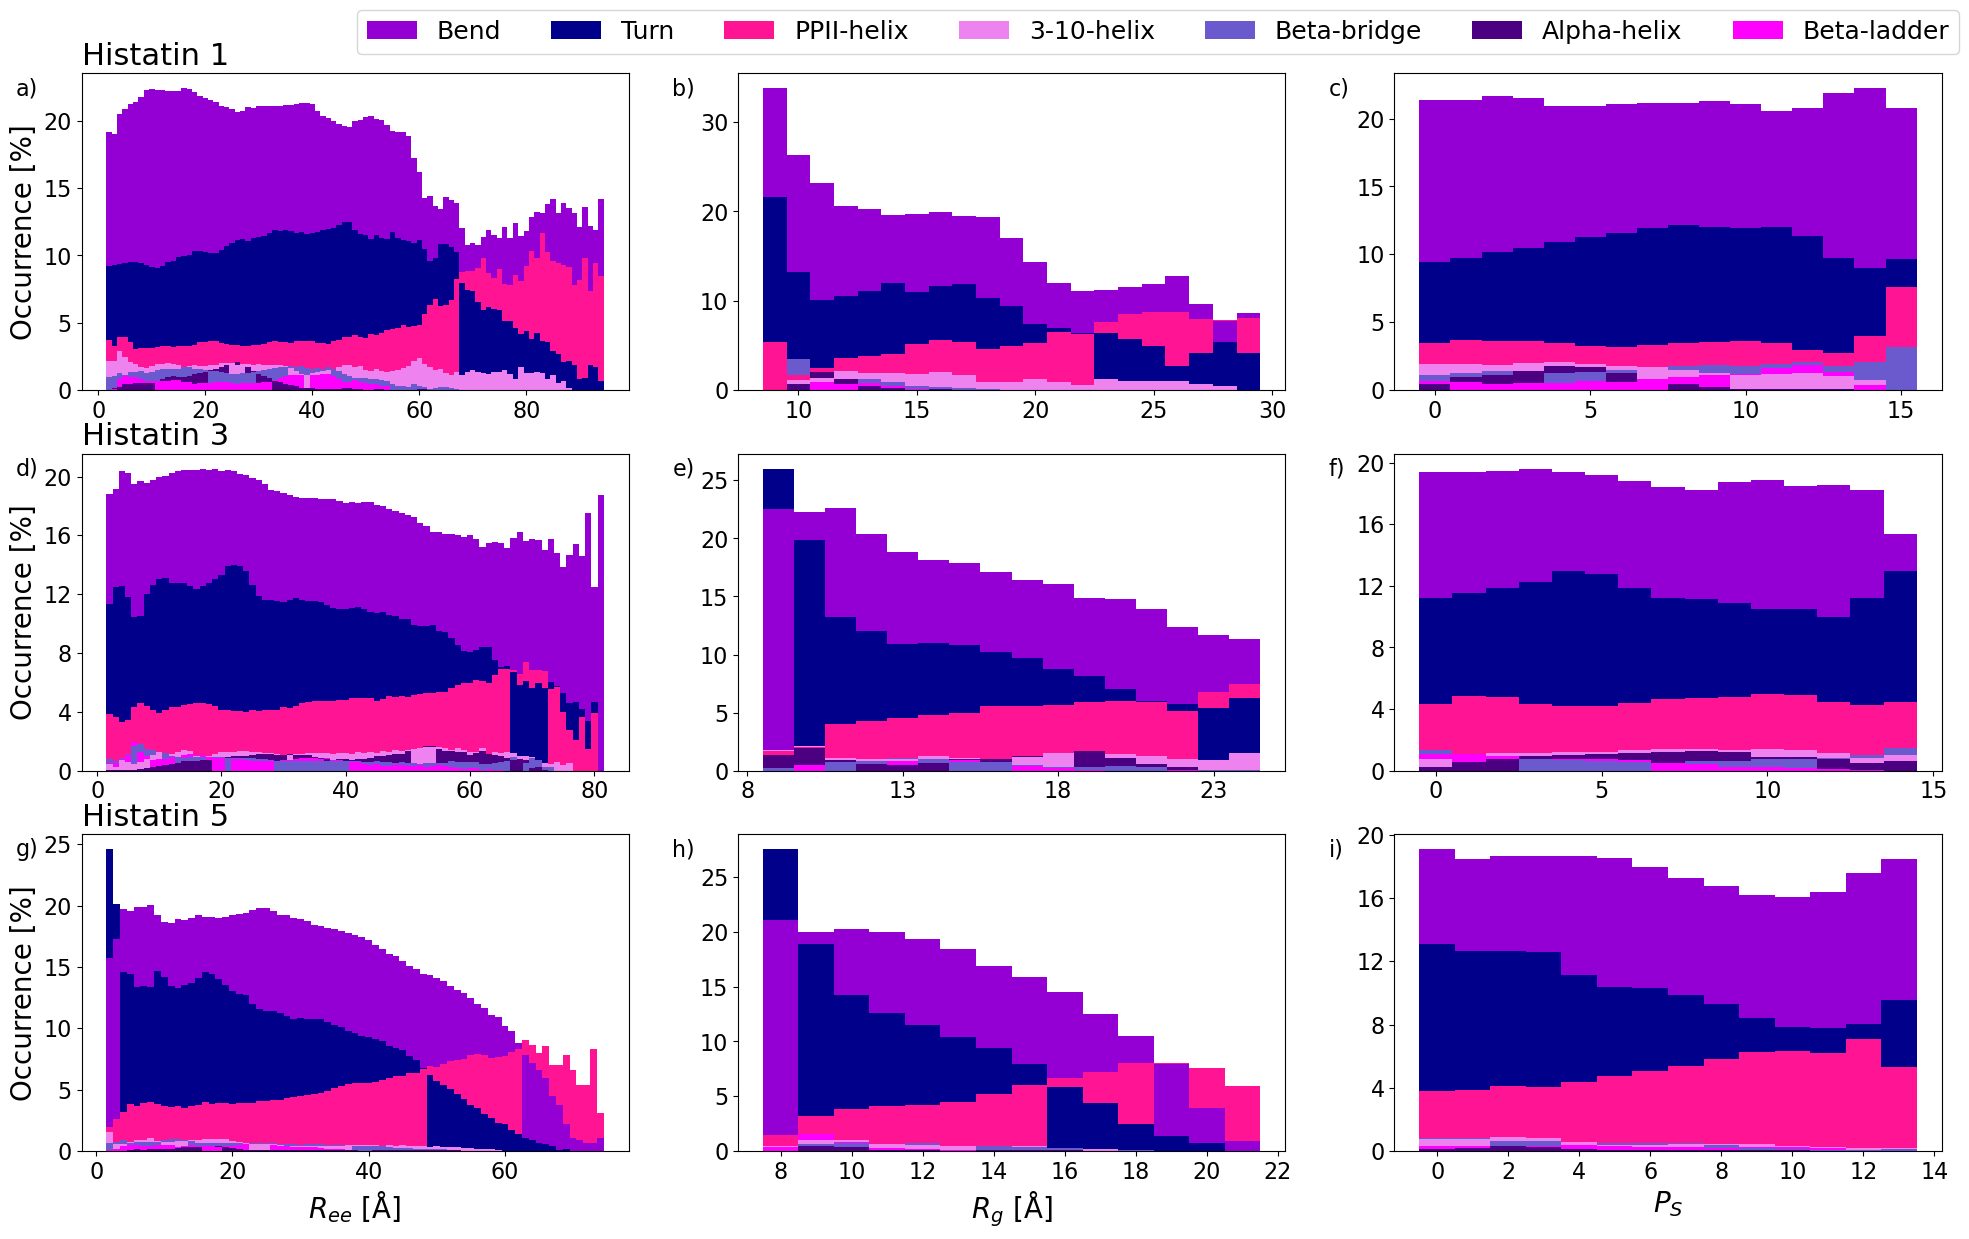

In [75]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(24, 14))

grp, dst = np.genfromtxt((work_dir + 'H1Ree_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Ree_H1/'
dssp_func(path, len(grp), grp, 0, 0, False)

grp, dst = np.genfromtxt((work_dir + 'H1Rg_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Rg_H1/'
dssp_func(path, len(grp), grp, 0, 1, True)

grp, dst = np.genfromtxt((work_dir + 'H1PS_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/PS_H1/'
dssp_func(path, len(grp), grp, 0, 2, True)

#grp, dst = np.genfromtxt((work_dir + 'H1CP_dist.dat'), usecols=(0, 1), unpack=True)
#path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/CP_H1/'
#dssp_func(path, len(grp), grp, 0, 3, True)


grp, dst = np.genfromtxt((work_dir + 'H3Ree_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Ree_H3/'
dssp_func(path, len(grp), grp, 1, 0, True)

grp, dst = np.genfromtxt((work_dir + 'H3Rg_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Rg_H3/'
dssp_func(path, len(grp), grp, 1, 1, True)

grp, dst = np.genfromtxt((work_dir + 'H3PS_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/PS_H3/'
dssp_func(path, len(grp), grp, 1, 2, True)

#grp, dst = np.genfromtxt((work_dir + 'H3CP_dist.dat'), usecols=(0, 1), unpack=True)
#path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/CP_H3/'
#dssp_func(path, len(grp), grp, 1, 3, False)


grp, dst = np.genfromtxt((work_dir + 'H5Ree_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Ree_H5/'
dssp_func(path, len(grp), grp, 2, 0, True)

grp, dst = np.genfromtxt((work_dir + 'H5Rg_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Rg_H5/'
dssp_func(path, len(grp), grp, 2, 1, True)

grp, dst = np.genfromtxt((work_dir + 'H5PS_dist.dat'), usecols=(0, 1), unpack=True)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/PS_H5/'
dssp_func(path, len(grp), grp, 2, 2, True)

#grp, dst = np.genfromtxt((work_dir + 'H5CP_dist.dat'), usecols=(0, 1), unpack=True)
#path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/CP_H5/'
#dssp_func(path, len(grp), grp, 2, 3, True)

ax[0, 0].set_ylabel('Occurrence [%]', fontsize=20)
ax[1, 0].set_ylabel('Occurrence [%]', fontsize=20)
ax[2, 0].set_ylabel('Occurrence [%]', fontsize=20)
ax[2, 0].set_xlabel('$R_{ee}$ [Å]', fontsize=20)
ax[2, 1].set_xlabel('$R_{g}$ [Å]', fontsize=20)
ax[2, 2].set_xlabel('$P_{S}$', fontsize=20)
#ax[2, 3].set_xlabel('$X_{conf}$', fontsize=14)

ax[0, 0].set_title('Histatin 1', fontsize=22, loc='left')
ax[1, 0].set_title('Histatin 3', fontsize=22, loc='left')
ax[2, 0].set_title('Histatin 5', fontsize=22, loc='left')

ax[1, 0].set_yticks(range(0, 22, 4))
ax[1, 2].set_yticks(range(0, 22, 4))
#ax[1, 3].set_yticks(range(0, 22, 3))
ax[2, 2].set_yticks(range(0, 22, 4))

ax[0, 0].text(-0.12,0.93,"a)",fontsize=16,transform=ax[0, 0].transAxes)
ax[0, 1].text(-0.12,0.93,"b)",fontsize=16,transform=ax[0, 1].transAxes)
ax[0, 2].text(-0.12,0.93,"c)",fontsize=16,transform=ax[0, 2].transAxes)
ax[1, 0].text(-0.12,0.93,"d)",fontsize=16,transform=ax[1, 0].transAxes)
ax[1, 1].text(-0.12,0.93,"e)",fontsize=16,transform=ax[1, 1].transAxes)
ax[1, 2].text(-0.12,0.93,"f)",fontsize=16,transform=ax[1, 2].transAxes)
ax[2, 0].text(-0.12,0.93,"g)",fontsize=16,transform=ax[2, 0].transAxes)
ax[2, 1].text(-0.12,0.93,"h)",fontsize=16,transform=ax[2, 1].transAxes)
ax[2, 2].text(-0.12,0.93,"i)",fontsize=16,transform=ax[2, 2].transAxes)

ax[0, 0].tick_params(labelsize=16)
ax[0, 1].tick_params(labelsize=16)
ax[0, 2].tick_params(labelsize=16)
ax[1, 0].tick_params(labelsize=16)
ax[1, 1].tick_params(labelsize=16)
ax[1, 2].tick_params(labelsize=16)
ax[2, 0].tick_params(labelsize=16)
ax[2, 1].tick_params(labelsize=16)
ax[2, 2].tick_params(labelsize=16)

ax[1, 1].set_xticks(range(8, 25, 5))
ax[0, 2].set_xticks(range(0, 20, 5))
ax[1, 2].set_xticks(range(0, 20, 5))

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Decomp_Hsts_DSSP.png', bbox_inches='tight')

## FEL

In [44]:
def runTICA(features, dimensions=2, lag=20):
    print("Running TICA...")
    estimator = TICA(dim = dimensions, lagtime = lag).fit(features)
    tica_data = estimator.fetch_model().transform(features).T
    return tica_data

In [45]:
Hst1_traj = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/protein_trjcat.xtc'
Hst1_top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/protein_1.gro' 
Hst1 = md.load(Hst1_traj, top=Hst1_top, stride=3)

Hst3_traj = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/protein_trjcat.xtc'
Hst3_top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/protein_1.gro' 
Hst3 = md.load(Hst3_traj, top=Hst3_top, stride=3)

Hst5_traj = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/protein_trjcat.xtc'
Hst5_top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/protein_1.gro' 
Hst5 = md.load(Hst5_traj, top=Hst5_top, stride=3)

In [46]:
phi = md.compute_phi(Hst1)[1]
psi = md.compute_psi(Hst1)[1]
Hst1_phipsi = np.hstack([phi, psi])

phi = md.compute_phi(Hst3)[1]
psi = md.compute_psi(Hst3)[1]
Hst3_phipsi = np.hstack([phi, psi])

phi = md.compute_phi(Hst5)[1]
psi = md.compute_psi(Hst5)[1]
Hst5_phipsi = np.hstack([phi, psi])

In [47]:
Hst1_10 = runTICA(Hst1_phipsi, lag=10)
Hst1_50 = runTICA(Hst1_phipsi, lag=50)
Hst1_100 = runTICA(Hst1_phipsi, lag=100)

Hst3_10 = runTICA(Hst3_phipsi, lag=10)
Hst3_50 = runTICA(Hst3_phipsi, lag=50)
Hst3_100 = runTICA(Hst3_phipsi, lag=100)

Hst5_10 = runTICA(Hst5_phipsi, lag=10)
Hst5_50 = runTICA(Hst5_phipsi, lag=50)
Hst5_100 = runTICA(Hst5_phipsi, lag=100)

Running TICA...
Running TICA...
Running TICA...
Running TICA...
Running TICA...
Running TICA...
Running TICA...
Running TICA...
Running TICA...


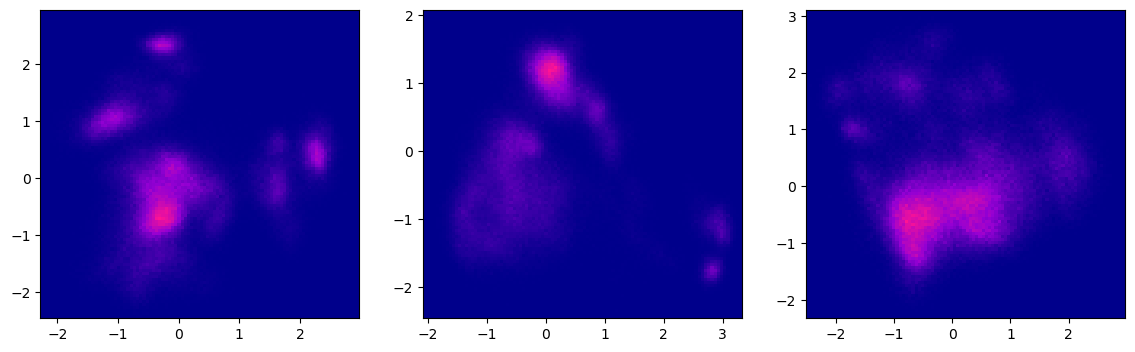

In [48]:
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 10
color_list = cmap(np.linspace(0, 1, amount))
kB = 0.008314
T = 298

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14, 4))
h, x1, y1, i = ax[0].hist2d(Hst1_50[0], Hst1_50[1], cmap=cmap, bins=100)
h = h + 1
energy = -kB*T*np.log(h/np.max(h))
energy = energy - np.max(energy)
energy_1 = energy
h, x3, y3, i = ax[1].hist2d(Hst3_50[0], Hst3_50[1], cmap=cmap, bins=100)
h = h + 1
energy = -kB*T*np.log(h/np.max(h))
energy = energy - np.max(energy)
energy_3 = energy
h, x5, y5, i = ax[2].hist2d(Hst5_50[0], Hst5_50[1], cmap=cmap, bins=100)
h = h + 1
energy = -kB*T*np.log(h/np.max(h))
energy = energy - np.max(energy)
energy_5 = energy

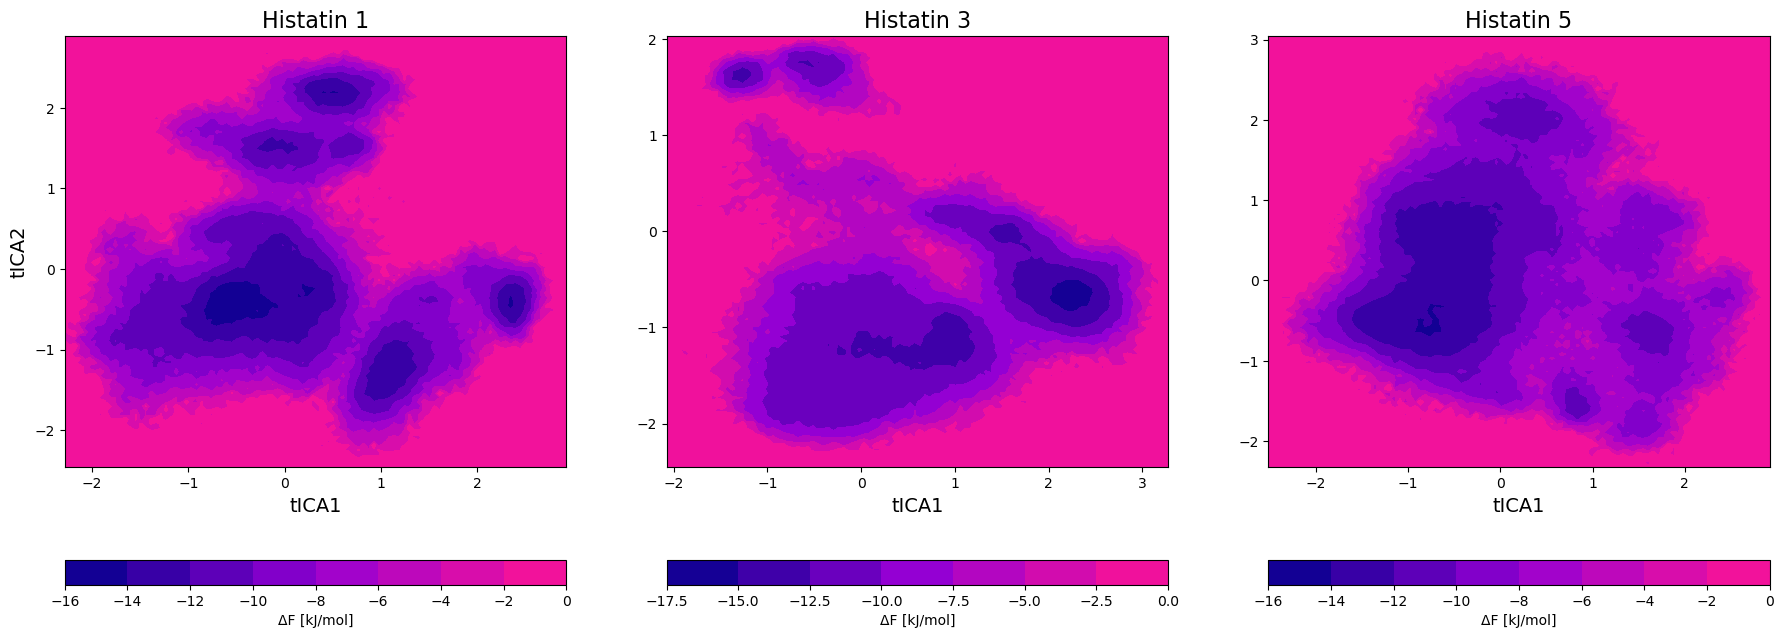

In [81]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22, 8))
im = ax[0].contourf(x1[0:-1], y1[0:-1], energy_1, cmap=cmap)
fig.colorbar(im, orientation='horizontal', label='ΔF [kJ/mol]')
im = ax[1].contourf(x3[0:-1], y3[0:-1], energy_3, cmap=cmap)
fig.colorbar(im, orientation='horizontal', label='ΔF [kJ/mol]')
im = ax[2].contourf(x5[0:-1], y5[0:-1], energy_5, cmap=cmap)
fig.colorbar(im, orientation='horizontal', label='ΔF [kJ/mol]')

ax[1].set_yticks(range(-2, 3, 1))
ax[0].set_yticks(range(-2, 3, 1))
ax[0].set_xlabel('tICA1', fontsize=14)
ax[1].set_xlabel('tICA1', fontsize=14)
ax[2].set_xlabel('tICA1', fontsize=14)
ax[0].set_ylabel('tICA2', fontsize=14)
ax[0].set_title('Histatin 1', fontsize=16)
ax[1].set_title('Histatin 3', fontsize=16)
ax[2].set_title('Histatin 5', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Free_energy_Hsts.png', bbox_inches='tight')

## FEL_phospo

In [109]:
def runTICA(features, dimensions=2, lag=20):
    print("Running TICA...")
    estimator = TICA(dim = dimensions, lagtime = lag).fit(features)
    tica_data = estimator.fetch_model().transform(features).T
    return tica_data

pho_traj = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/protein_trjcat.xtc'
pho_top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/protein_1.gro' 
pho = md.load(pho_traj, top=pho_top, stride=3)

npho_traj = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/protein_trjcat.xtc'
npho_top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/protein_1.gro' 
npho = md.load(npho_traj, top=npho_top, stride=3)

In [110]:
phi = md.compute_phi(pho)[1]
psi = md.compute_psi(pho)[1]
pho_phipsi = np.hstack([phi, psi])

phi = md.compute_phi(npho)[1]
psi = md.compute_psi(npho)[1]
npho_phipsi = np.hstack([phi, psi])

In [112]:
pho_50 = runTICA(pho_phipsi, lag=50)
npho_50 = runTICA(npho_phipsi, lag=50)

Running TICA...
Running TICA...


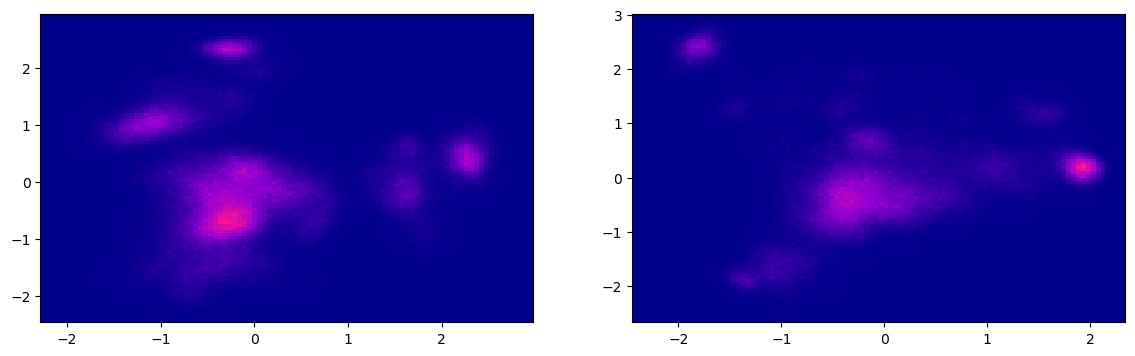

In [113]:
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 10
color_list = cmap(np.linspace(0, 1, amount))
kB = 0.008314
T = 298

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))
h, x1, y1, i = ax[0].hist2d(pho_50[0], pho_50[1], cmap=cmap, bins=100)
h = h + 1
energy = -kB*T*np.log(h/np.max(h))
energy = energy - np.max(energy)
energy_1 = energy
h, x3, y3, i = ax[1].hist2d(npho_50[0], npho_50[1], cmap=cmap, bins=100)
h = h + 1
energy = -kB*T*np.log(h/np.max(h))
energy = energy - np.max(energy)
energy_3 = energy

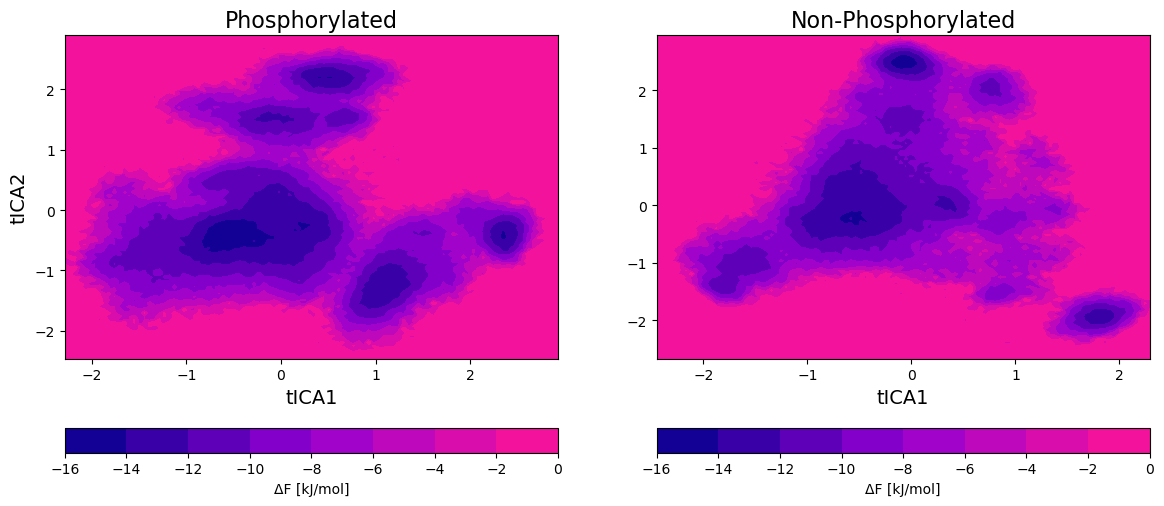

In [114]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
im = ax[0].contourf(x1[0:-1], y1[0:-1], energy_1, cmap=cmap)
fig.colorbar(im, orientation='horizontal', label='ΔF [kJ/mol]')
im = ax[1].contourf(x3[0:-1], y3[0:-1], energy_3, cmap=cmap)
fig.colorbar(im, orientation='horizontal', label='ΔF [kJ/mol]')

ax[0].set_xlabel('tICA1', fontsize=14)
ax[1].set_xlabel('tICA1', fontsize=14)
ax[0].set_ylabel('tICA2', fontsize=14)
ax[0].set_title('Phosphorylated', fontsize=16)
ax[1].set_title('Non-Phosphorylated', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Free_energy_phospo.png', bbox_inches='tight')

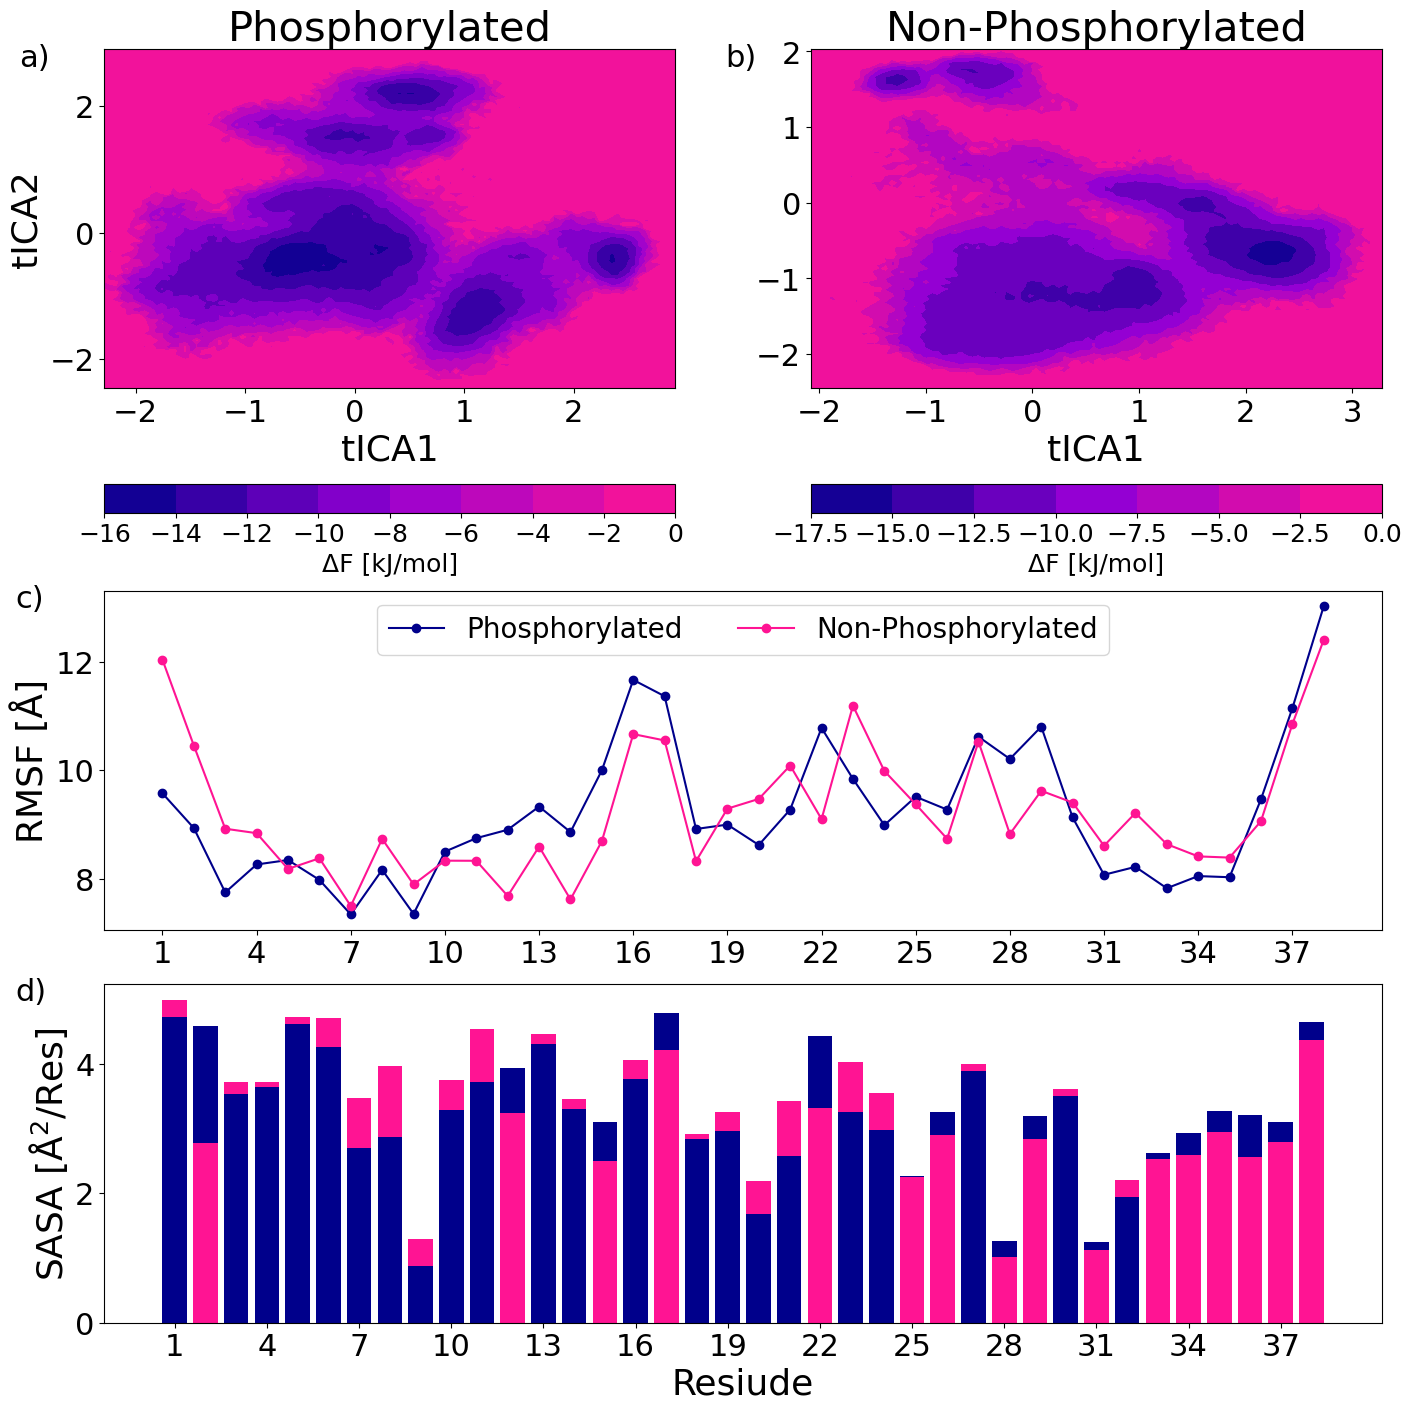

In [73]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower', 'lower'],
                               ['lower2', 'lower2']], 
                              figsize=(14, 14), layout='constrained')

im = ax['upper left'].contourf(x1[0:-1], y1[0:-1], energy_1, cmap=cmap)
test = fig.colorbar(im, orientation='horizontal')
test.ax.tick_params(labelsize=18)
test.set_label('ΔF [kJ/mol]', fontsize=18)
im = ax['upper right'].contourf(x3[0:-1], y3[0:-1], energy_3, cmap=cmap)
test = fig.colorbar(im, orientation='horizontal')
test.ax.tick_params(labelsize=18)
test.set_label('ΔF [kJ/mol]', fontsize=18)
ax['upper left'].set_xlabel('tICA1', fontsize=26)
ax['upper right'].set_xlabel('tICA1', fontsize=26)
ax['upper left'].set_ylabel('tICA2', fontsize=26)
ax['upper left'].set_title('Phosphorylated', fontsize=30)
ax['upper right'].set_title('Non-Phosphorylated', fontsize=30)

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
ax['lower'].plot(a, b*10, marker='o', color='darkblue')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
ax['lower'].plot(a, b*10, marker='o', color='deeppink')


file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/SASA_RMSF/sasa_pho.xvg'
a, b1 = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=25)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/SASA_RMSF/sasa_npho.xvg'
a, b2 = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=25)
counter = 0
for (i, j) in zip(b1, b2):
    if i < j:
        ax['lower2'].bar(a[counter], (j*100)/38, color='deeppink')
        ax['lower2'].bar(a[counter], (i*100)/38, color='darkblue')
    else:
        ax['lower2'].bar(a[counter], (i*100)/38, color='darkblue')
        ax['lower2'].bar(a[counter], (j*100)/38, color='deeppink')
    counter += 1

ax['lower'].legend([ 'Phosphorylated', 'Non-Phosphorylated'], 
          ncols=2, loc='upper center', fontsize=20)
ax['lower'].set_xticks(range(1, 39, 3))
ax['lower2'].set_xticks(range(1, 39, 3))
ax['lower2'].set_xlabel('Resiude', fontsize=26)
ax['lower'].set_ylabel('RMSF [Å]', fontsize=26)
ax['lower2'].set_ylabel('SASA [Å$^{2}$/Res]', fontsize=26)

ax['upper left'].text(-0.15,0.95,"a)",fontsize=22,transform=ax['upper left'].transAxes)
ax['upper right'].text(-0.15,0.95,"b)",fontsize=22,transform=ax['upper right'].transAxes)
ax['lower'].text(-0.07,0.95,"c)",fontsize=22,transform=ax['lower'].transAxes)
ax['lower2'].text(-0.07,0.95,"d)",fontsize=22,transform=ax['lower2'].transAxes)
ax['upper left'].tick_params(labelsize=22)
ax['upper right'].tick_params(labelsize=22)
ax['lower'].tick_params(labelsize=22)
ax['lower2'].tick_params(labelsize=22)

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Free_energy_phospo.png', bbox_inches='tight')

## CD

<>:61: SyntaxWarning: invalid escape sequence '\T'
<>:61: SyntaxWarning: invalid escape sequence '\T'
/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_1537/2044550051.py:61: SyntaxWarning: invalid escape sequence '\T'
  ax[0].set_ylabel('$\Theta$ [deg*cm$^{2}$/dmol]', fontsize=20)


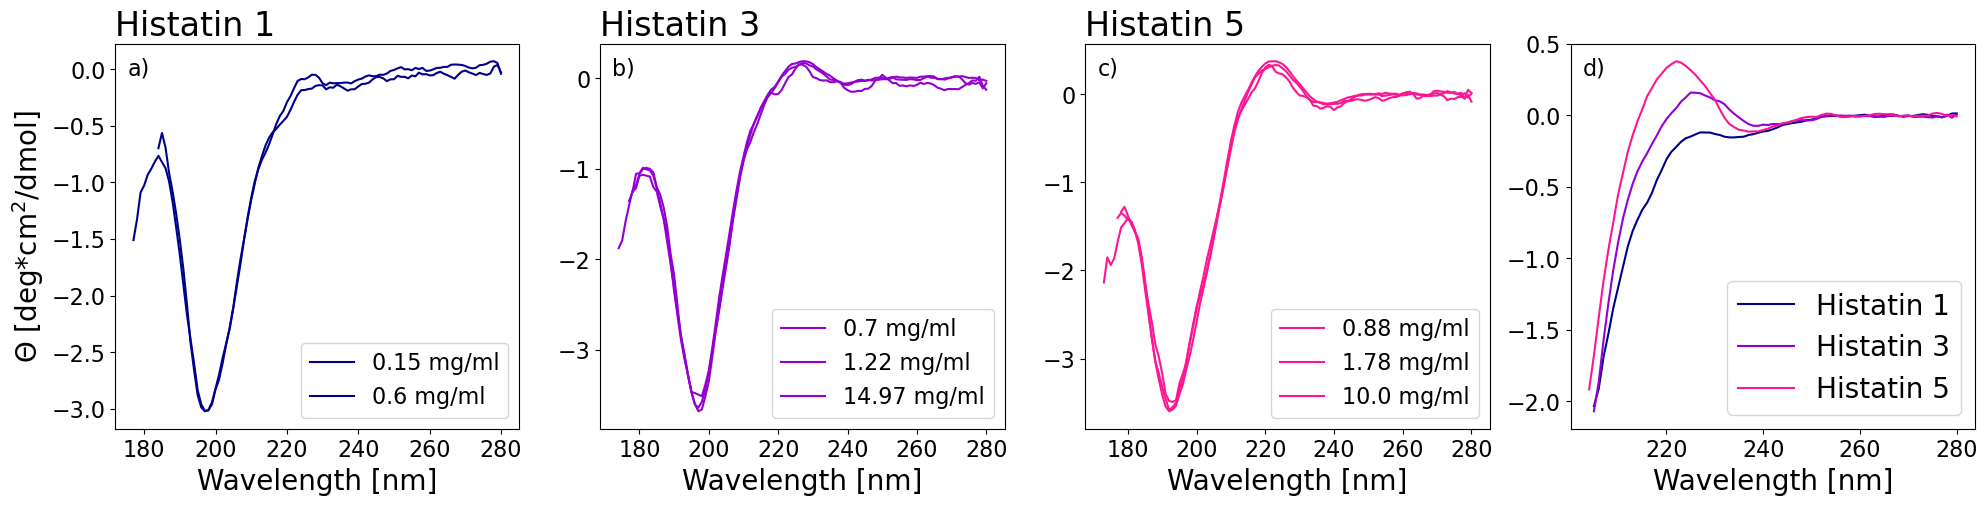

In [64]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(24, 5))

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst1HS_0.6.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[0].plot(w, s, color='darkblue')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst1HS_0.15.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[0].plot(w, s, color='darkblue')


file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst3HS_0.7.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[1].plot(w, s, color='darkviolet')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst3HS_1.22.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[1].plot(w, s, color='darkviolet')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst3HS_14.97.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[1].plot(w, s, color='darkviolet')


file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst5HS_0.88.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[2].plot(w, s, color='deeppink')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst5HS_1.78.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[2].plot(w, s, color='deeppink')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst5HS_10.0.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[2].plot(w, s, color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst1_PPII.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[3].plot(w, s, color='darkblue')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst3_PPII.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[3].plot(w, s, color='darkviolet')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst5_PPII.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax[3].plot(w, s, color='deeppink')


ax[0].set_xlabel('Wavelength [nm]', fontsize=20)
ax[1].set_xlabel('Wavelength [nm]', fontsize=20)
ax[2].set_xlabel('Wavelength [nm]', fontsize=20)
ax[3].set_xlabel('Wavelength [nm]', fontsize=20)
ax[0].text(0.03,0.92,"a)",fontsize=16,transform=ax[0].transAxes)
ax[1].text(0.03,0.92,"b)",fontsize=16,transform=ax[1].transAxes)
ax[2].text(0.03,0.92,"c)",fontsize=16,transform=ax[2].transAxes)
ax[3].text(0.03,0.92,"d)",fontsize=16,transform=ax[3].transAxes)
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)
ax[2].tick_params(labelsize=16)
ax[3].tick_params(labelsize=16)
ax[0].set_title('Histatin 1', fontsize=24, loc='left')
ax[1].set_title('Histatin 3', fontsize=24, loc='left')
ax[2].set_title('Histatin 5', fontsize=24, loc='left')
#ax[0].set_title('0.15, 0.6 mg/ml ', fontsize=16, loc='left')
#ax[1].set_title('0.7, 1.22, 14.97 mg/ml ', fontsize=16, loc='left')
#ax[2].set_title('0.88, 1.78, 10.0 mg/ml ', fontsize=16, loc='left')
ax[0].set_ylabel('$\Theta$ [deg*cm$^{2}$/dmol]', fontsize=20)
ax[3].legend(['Histatin 1', 'Histatin 3', 'Histatin 5'], fontsize=20)
ax[0].legend(['0.15 mg/ml', '0.6 mg/ml'], fontsize=16)
ax[1].legend(['0.7 mg/ml', '1.22 mg/ml', '14.97 mg/ml'], fontsize=16)
ax[2].legend(['0.88 mg/ml', '1.78 mg/ml', '10.0 mg/ml'], fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hsts_CD.png', bbox_inches='tight')

## RMSF

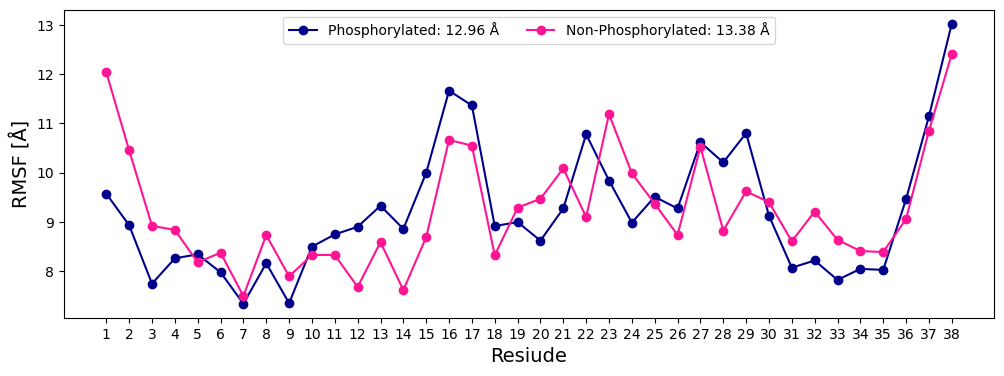

In [209]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
pho = sum(b)/len(b)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
npho = sum(b)/len(b)

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
ax.plot(a, b*10, marker='o', color='darkblue')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
ax.plot(a, b*10, marker='o', color='deeppink')

ax.legend([ 'Phosphorylated: ' +  str(pho*10)[0:5] + ' Å', 'Non-Phosphorylated: ' + str(npho*10)[0:5] + ' Å'], 
          ncols=2, loc='upper center')
ax.set_xticks(range(1, 39))
ax.set_xlabel('Resiude', fontsize=14)
ax.set_ylabel('RMSF [Å]', fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/phospo_rmsf.png', bbox_inches='tight')

## SAXS

In [332]:
def pddf_load(file_path):
    with open(file_path) as PDDF:
        lines = PDDF.readlines()
        counter = 0
        for line in lines:
            if line == ref:
                start = counter + 2
            counter += 1
    PDDF.close()
    r, P = np.genfromtxt(file_path, skip_header=start, unpack=True, usecols=(0, 1))
    return r, P

In [319]:
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K.dat'
q, I = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
with open('/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K_Å.dat', 'w') as file:
    for (Q, i) in zip(q, I):
        file.write(str(Q/10) + ' ' + str(i) + '\n')

0.3129797683125326
0.21627243243954483
0.41435107140075844


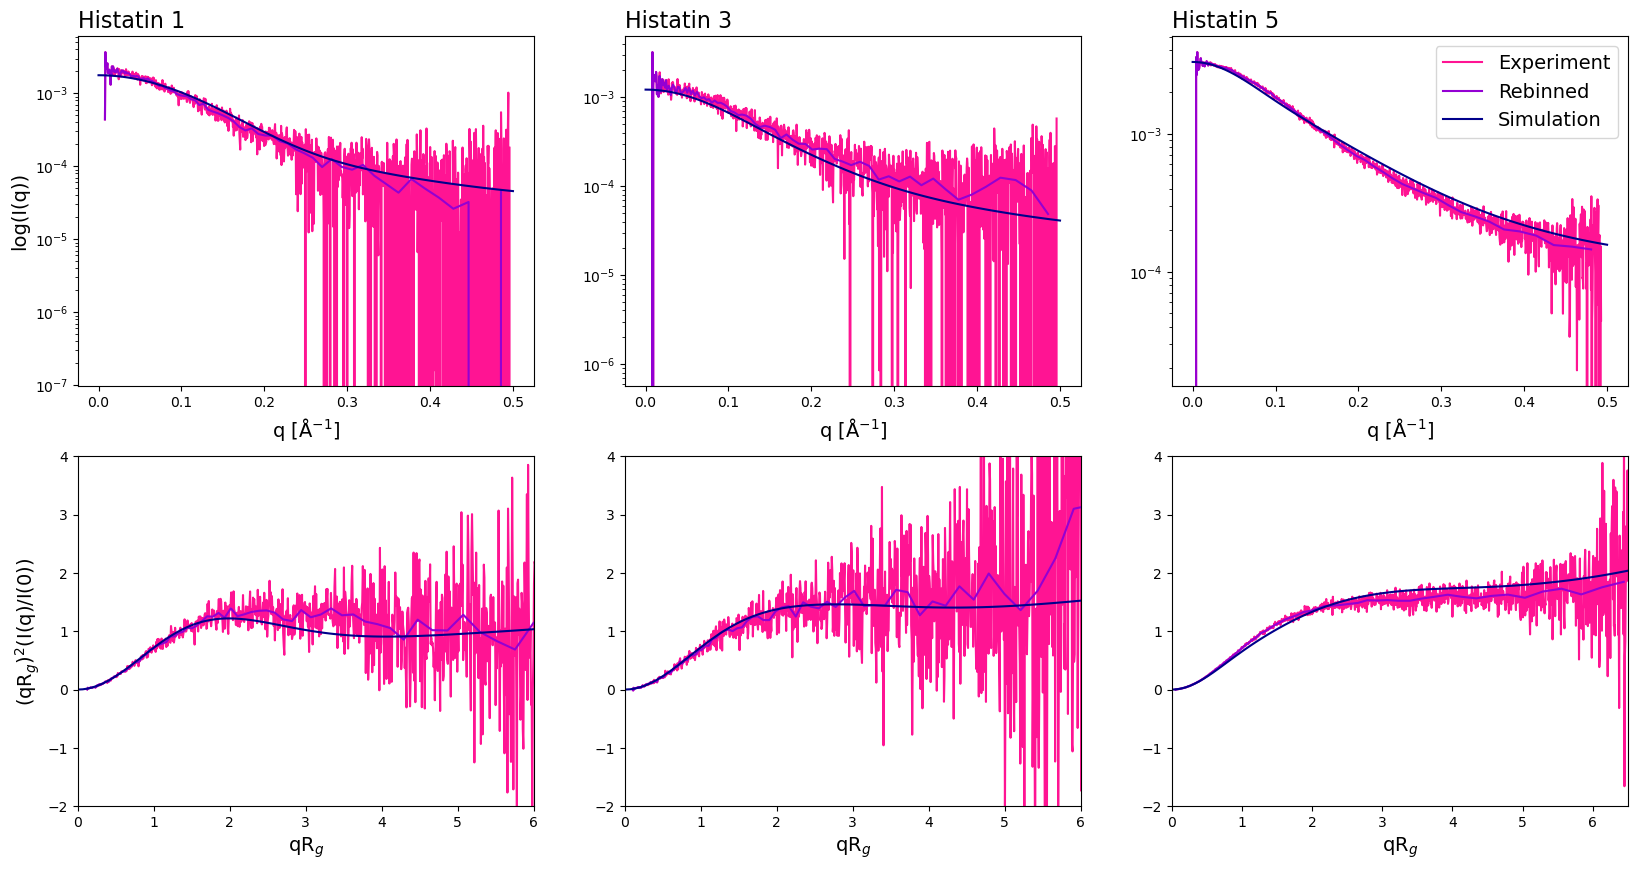

In [28]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_e = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_er = q_er/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/average.dat'
q_s, I_s = np.genfromtxt(path, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.0021
Rg_e = 15.9
Rg_ave = 12.96
I_s = I_s*coeff
ax[0, 0].plot(q_e, I_e, color='deeppink')
ax[0, 0].plot(q_er, I_er, color='darkviolet')
ax[0, 0].plot(q_s, I_s, color='darkblue')
ax[1, 0].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax[1, 0].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax[1, 0].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_er = q_er/10
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hst3_CRY.dat'
q_s, I_s = np.genfromtxt(file, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.0014
Rg_e = 13.80
Rg_ave = 14.05
I_s = I_s*coeff
ax[0, 1].plot(q_e, I_e, color='deeppink')
ax[0, 1].plot(q_er, I_er, color='darkviolet')
ax[0, 1].plot(q_s, I_s, color='darkblue')
ax[1, 1].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax[1, 1].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax[1, 1].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_e = I_e/1000
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_er = I_er/1000
q_er = q_er/10
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/SAXS_ave.dat'
q_s, I_s = np.genfromtxt(file, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.00326
Rg_e = 13.4
Rg_ave = 13.16
I_s = I_s*coeff
ax[0, 2].plot(q_e, I_e, color='deeppink')
ax[0, 2].plot(q_er, I_er, color='darkviolet')
ax[0, 2].plot(q_s, I_s, color='darkblue')
ax[1, 2].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax[1, 2].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax[1, 2].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
ax[0, 0].set_yscale('log')
ax[0, 1].set_yscale('log')
ax[0, 2].set_yscale('log')
ax[1, 0].set_xlim(0, 6)
ax[1, 0].set_ylim(-2, 4)
ax[1, 1].set_xlim(0, 6)
ax[1, 1].set_ylim(-2, 4)
ax[1, 2].set_xlim(0, 6.5)
ax[1, 2].set_ylim(-2, 4)
ax[0, 0].set_title('Histatin 1', fontsize=16, loc='left')
ax[0, 1].set_title('Histatin 3', fontsize=16, loc='left')
ax[0, 2].set_title('Histatin 5', fontsize=16, loc='left')
ax[0, 0].set_xlabel('q [Å$^{-1}$]', fontsize=14)
ax[0, 1].set_xlabel('q [Å$^{-1}$]', fontsize=14)
ax[0, 2].set_xlabel('q [Å$^{-1}$]', fontsize=14)
ax[1, 0].set_xlabel('qR$_{g}$', fontsize=14)
ax[1, 1].set_xlabel('qR$_{g}$', fontsize=14)
ax[1, 2].set_xlabel('qR$_{g}$', fontsize=14)
ax[0, 0].set_ylabel('log(I(q))', fontsize=14)
ax[1, 0].set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=14)
ax[0, 2].legend(['Experiment', 'Rebinned', 'Simulation'], fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/SAXS_comp_Hsts.png', bbox_inches='tight')

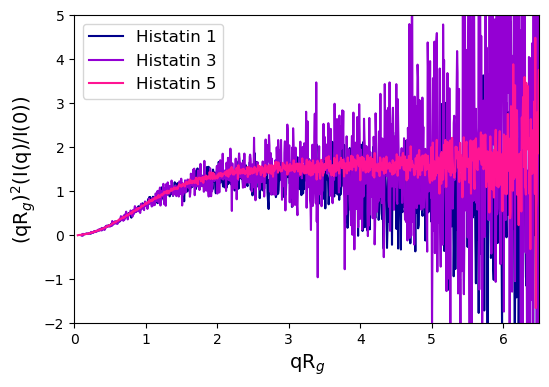

In [49]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_e = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
I0_e = 0.0021
Rg_e = 15.9
ax.plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='darkblue')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
I0_e = 0.0014
Rg_e = 13.8
ax.plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='darkviolet')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_e = I_e/1000
q_e = q_e/10
I0_e = 0.00326
Rg_e = 13.4
ax.plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')

ax.set_xlim(0, 6.5)
ax.set_ylim(-2, 5)
ax.set_xlabel('qR$_{g}$', fontsize=14)
ax.set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=14)
ax.legend(['Histatin 1', 'Histatin 3', 'Histatin 5'], fontsize=12)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Kratky_comp.png', bbox_inches='tight')

## Pairdist

In [101]:
length = range(0, 24, 1)
for j in length:
    dist_min = []
    for i in length:
        file1 = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Pairdist/Hst5/' + 'Res' + str(j) + '/' + str(i) + '.xvg'
        x, y = np.genfromtxt(file1, unpack=True, skip_header=24)
        y.sort()
        dist_min.append(y[0])
    print('Ref' + str(j) + ': Finished')
    with open('/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Pairdist/Hst5/' + 'Res' + str(j) + '/out.dat', 'w') as file2:
        for (k, h) in zip(length, dist_min):
            file2.write(str(k) + ' ' + str(h) + ' ' + '\n')

Ref0: Finished
Ref1: Finished
Ref2: Finished
Ref3: Finished
Ref4: Finished
Ref5: Finished
Ref6: Finished
Ref7: Finished
Ref8: Finished
Ref9: Finished
Ref10: Finished
Ref11: Finished
Ref12: Finished
Ref13: Finished
Ref14: Finished
Ref15: Finished
Ref16: Finished
Ref17: Finished
Ref18: Finished
Ref19: Finished
Ref20: Finished
Ref21: Finished
Ref22: Finished
Ref23: Finished


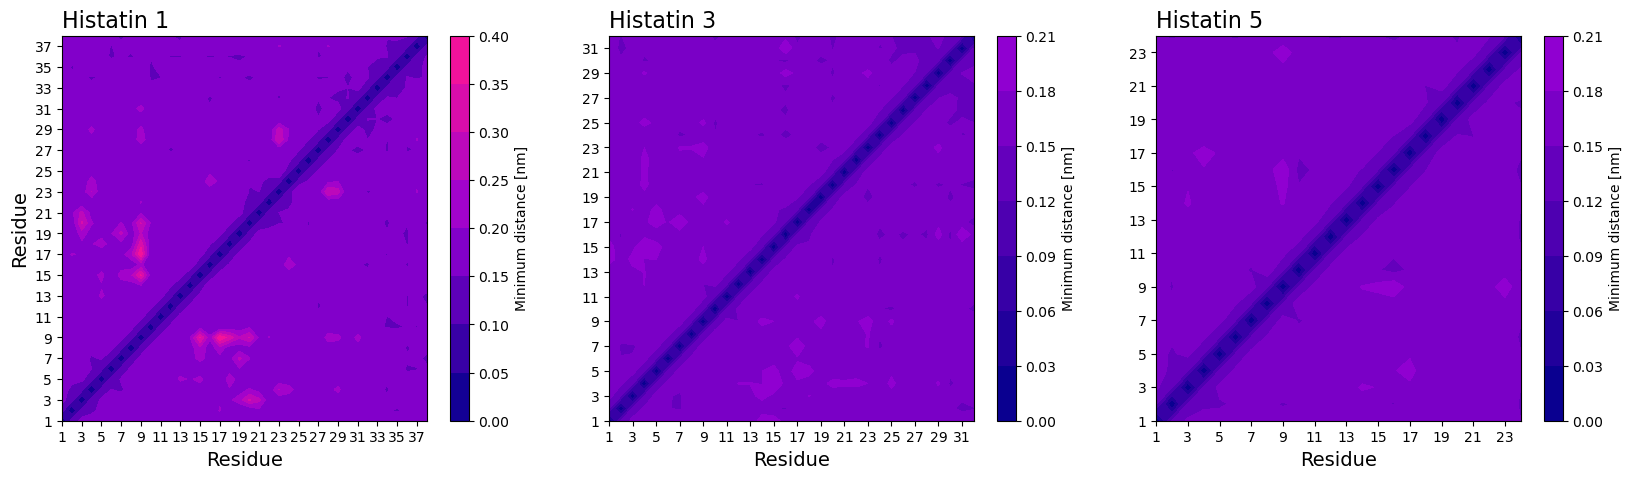

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 50
color_list = cmap(np.linspace(0, 1, amount))

Seq_x = np.expand_dims(np.arange(1, (38 + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (38 + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, 38, 1)
for i in length:
    file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/Pairdist/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[0].contourf(XX, YY, Z, cmap=cmap, vmin=0, vmax=0.4)
fig.colorbar(im, label = 'Minimum distance [nm]')

Seq_x = np.expand_dims(np.arange(1, (32 + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (32 + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, 32, 1)
for i in length:
    file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Pairdist/Hst3/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[1].contourf(XX, YY, Z, cmap=cmap, vmin=0, vmax=0.4)
fig.colorbar(im, label = 'Minimum distance [nm]')

Seq_x = np.expand_dims(np.arange(1, (24 + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (24 + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, 24, 1)
for i in length:
    file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Pairdist/Hst5/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[2].contourf(XX, YY, Z, cmap=cmap, vmin=0, vmax=0.4)
fig.colorbar(im, label = 'Minimum distance [nm]')

ax[0].set_xticks(range(1, 39, 2))
ax[1].set_xticks(range(1, 33, 2))
ax[2].set_xticks(range(1, 25, 2))
ax[0].set_yticks(range(1, 39, 2))
ax[1].set_yticks(range(1, 33, 2))
ax[2].set_yticks(range(1, 25, 2))

ax[0].set_ylabel('Residue', fontsize=14)
ax[0].set_xlabel('Residue', fontsize=14)
ax[1].set_xlabel('Residue', fontsize=14)
ax[2].set_xlabel('Residue', fontsize=14)
ax[0].set_title('Histatin 1', fontsize=16, loc='left')
ax[1].set_title('Histatin 3', fontsize=16, loc='left')
ax[2].set_title('Histatin 5', fontsize=16, loc='left')
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hsts_contact.png', bbox_inches='tight')

In [129]:
length = range(0, 38, 1)
for j in length:
    dist_min = []
    for i in length:
        file1 = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/Pairdist/' + 'Res' + str(j) + '/' + str(i) + '.xvg'
        x, y = np.genfromtxt(file1, unpack=True, skip_header=24)
        y.sort()
        dist_min.append(y[0])
    print('Ref' + str(j) + ': Finished')
    with open('/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/Pairdist/' + 'Res' + str(j) + '/out.dat', 'w') as file2:
        for (k, h) in zip(length, dist_min):
            file2.write(str(k) + ' ' + str(h) + ' ' + '\n')

Ref0: Finished
Ref1: Finished
Ref2: Finished
Ref3: Finished
Ref4: Finished
Ref5: Finished
Ref6: Finished
Ref7: Finished
Ref8: Finished
Ref9: Finished
Ref10: Finished
Ref11: Finished
Ref12: Finished
Ref13: Finished
Ref14: Finished
Ref15: Finished
Ref16: Finished
Ref17: Finished
Ref18: Finished
Ref19: Finished
Ref20: Finished
Ref21: Finished
Ref22: Finished
Ref23: Finished
Ref24: Finished
Ref25: Finished
Ref26: Finished
Ref27: Finished
Ref28: Finished
Ref29: Finished
Ref30: Finished
Ref31: Finished
Ref32: Finished
Ref33: Finished
Ref34: Finished
Ref35: Finished
Ref36: Finished
Ref37: Finished


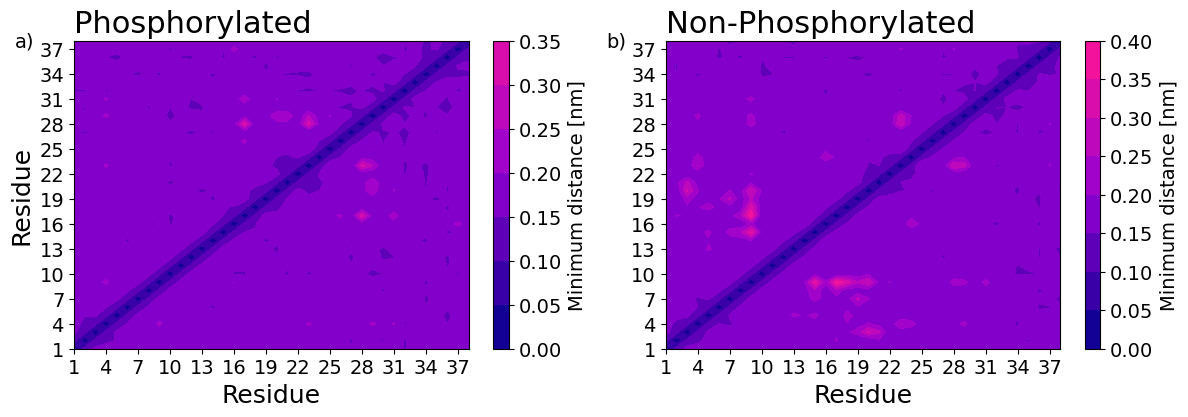

In [80]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))

Seq_x = np.expand_dims(np.arange(1, (38 + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (38 + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, 38, 1)
for i in length:
    file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Pairdist/Hst1/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[0].contourf(XX, YY, Z, cmap=cmap, vmin=0, vmax=0.4)
test = fig.colorbar(im)
test.ax.tick_params(labelsize=14)
test.set_label('Minimum distance [nm]', fontsize=14)

Seq_x = np.expand_dims(np.arange(1, (38 + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (38 + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, 38, 1)
for i in length:
    file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/Pairdist/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[1].contourf(XX, YY, Z, cmap=cmap, vmin=0, vmax=0.4)
test = fig.colorbar(im)
test.ax.tick_params(labelsize=14)
test.set_label('Minimum distance [nm]', fontsize=14)

ax[0].set_yticks(range(1, 39, 3))
ax[1].set_yticks(range(1, 39, 3))
ax[0].set_xticks(range(1, 39, 3))
ax[1].set_xticks(range(1, 39, 3))
ax[0].set_ylabel('Residue', fontsize=18)
ax[0].set_xlabel('Residue', fontsize=18)
ax[1].set_xlabel('Residue', fontsize=18)
ax[0].set_title('Phosphorylated', fontsize=22, loc='left')
ax[1].set_title('Non-Phosphorylated', fontsize=22, loc='left')
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

#ax[0].text(28, 17, 'X', color='white', fontsize=6)
ax[0].text(-0.15,0.98,"a)",fontsize=14,transform=ax[0].transAxes)
ax[1].text(-0.15,0.98,"b)",fontsize=14,transform=ax[1].transAxes)

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Phospo_contact.png', bbox_inches='tight')

## Disorder prediction

0.24295983379501382
0.2858989602169982
0.33233193445243797


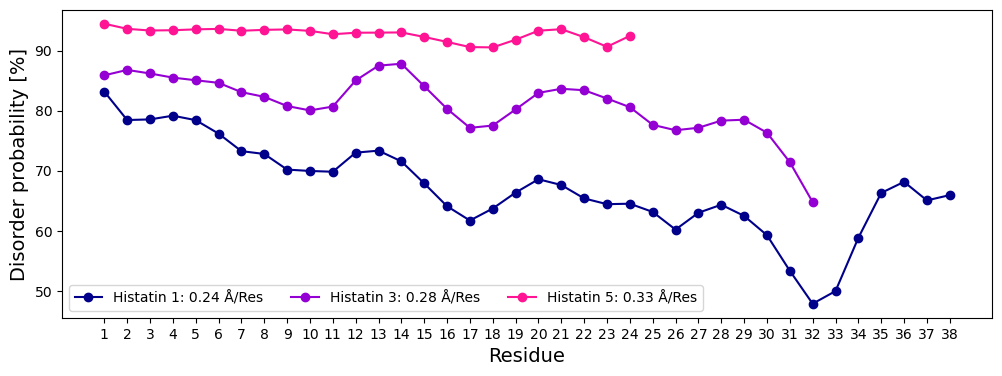

In [58]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst1.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax.plot(a, c*100, color='darkblue', marker='o')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst3.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax.plot(a, c*100, color='darkviolet', marker='o')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst5.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax.plot(a, c*100, color='deeppink', marker='o')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
npho = sum(b)/len(b)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
hst3 = sum(b)/len(b)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
hst5 = sum(b)/len(b)

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/38 )
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/32 )
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/24  )

ax.set_xticks(range(1, 39, 1))
ax.set_xlabel('Residue', fontsize=14)
ax.set_ylabel('Disorder probability [%]', fontsize=14)
ax.legend(['Histatin 1: 0.24 Å/Res', 'Histatin 3: 0.28 Å/Res', 'Histatin 5: 0.33 Å/Res'], 
          loc='lower left', ncols=3)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Disorder_Hsts.png', bbox_inches='tight')

## New_SAXS

In [8]:
def pddf_load(file_path):
    with open(file_path) as PDDF:
        lines = PDDF.readlines()
        counter = 0
        for line in lines:
            if line == ref:
                start = counter + 2
            counter += 1
    PDDF.close()
    r, P = np.genfromtxt(file_path, skip_header=start, unpack=True, usecols=(0, 1))
    return r, P

0.3129797683125326
0.21627243243954483
0.41435107140075844


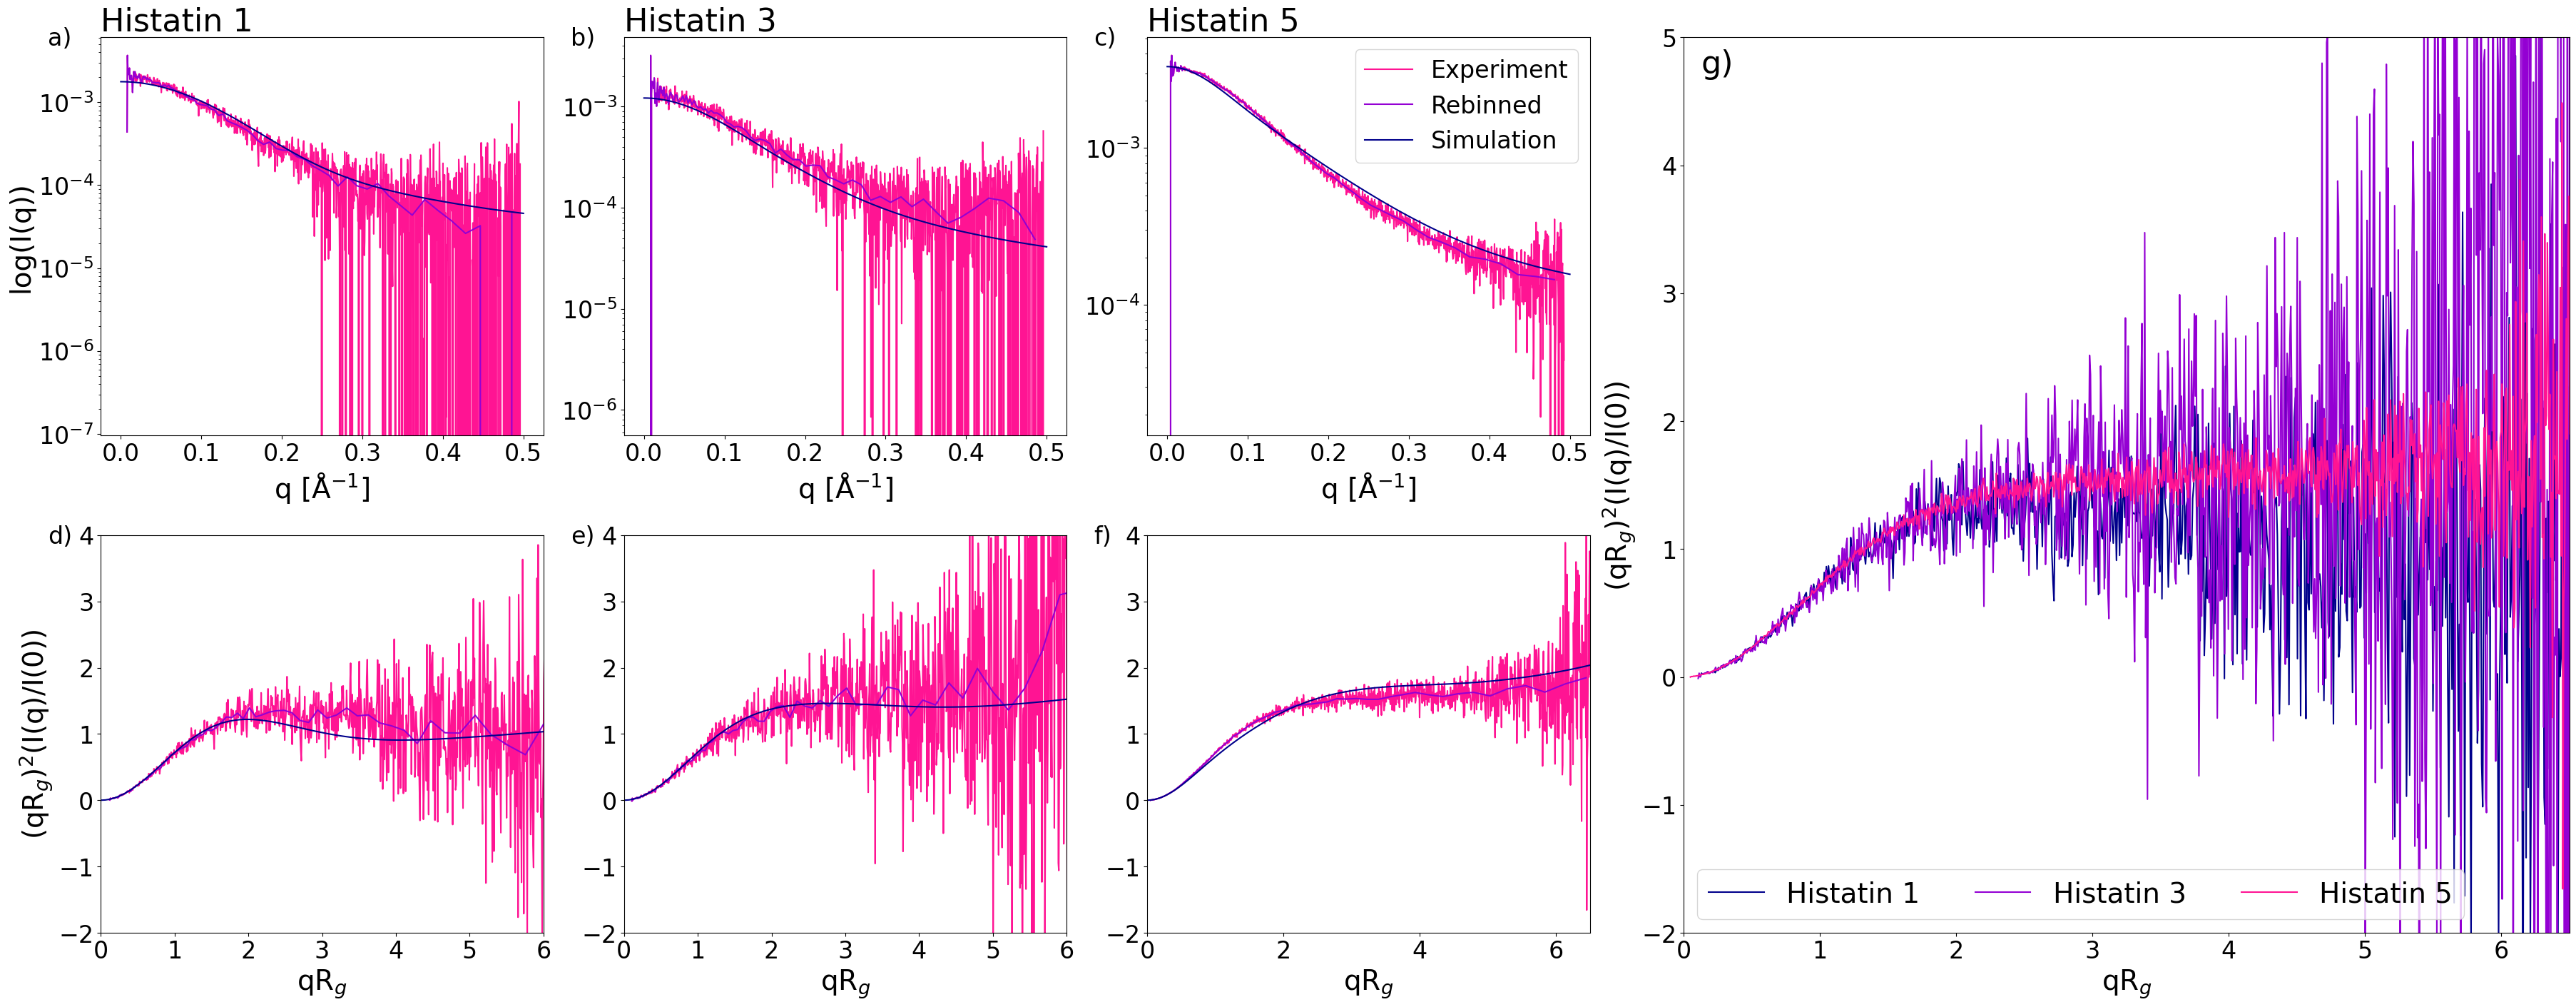

In [9]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper center', 'upper right', 'right', 'right'],
                               ['lower left', 'lower center', 'lower right', 'right', 'right']], 
                              figsize=(36, 14), layout='constrained')

path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_e = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_er = q_er/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/average.dat'
q_s, I_s = np.genfromtxt(path, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.0021
Rg_e = 15.9
Rg_ave = 12.96
I_s = I_s*coeff
ax['upper left'].plot(q_e, I_e, color='deeppink')
ax['upper left'].plot(q_er, I_er, color='darkviolet')
ax['upper left'].plot(q_s, I_s, color='darkblue')
ax['lower left'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax['lower left'].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax['lower left'].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_er = q_er/10
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hst3_CRY.dat'
q_s, I_s = np.genfromtxt(file, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.0014
Rg_e = 13.80
Rg_ave = 14.05
I_s = I_s*coeff
ax['upper center'].plot(q_e, I_e, color='deeppink')
ax['upper center'].plot(q_er, I_er, color='darkviolet')
ax['upper center'].plot(q_s, I_s, color='darkblue')
ax['lower center'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax['lower center'].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax['lower center'].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_e = I_e/1000
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_er = I_er/1000
q_er = q_er/10
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/SAXS_ave.dat'
q_s, I_s = np.genfromtxt(file, usecols=(0, 1), unpack=True)

coeff = 1/(I_s[40]/I_e[400])
I0_e = 0.00326
Rg_e = 13.4
Rg_ave = 13.16
I_s = I_s*coeff
ax['upper right'].plot(q_e, I_e, color='deeppink')
ax['upper right'].plot(q_er, I_er, color='darkviolet')
ax['upper right'].plot(q_s, I_s, color='darkblue')
ax['lower right'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax['lower right'].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax['lower right'].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')
chi = sum(((I_er - I_s[0:-2])**2)/I_s[0:-2])
print(chi)

# ----
ax['upper left'].set_yscale('log')
ax['upper center'].set_yscale('log')
ax['upper right'].set_yscale('log')
ax['lower left'].set_xlim(0, 6)
ax['lower left'].set_ylim(-2, 4)
ax['lower center'].set_xlim(0, 6)
ax['lower center'].set_ylim(-2, 4)
ax['lower right'].set_xlim(0, 6.5)
ax['lower right'].set_ylim(-2, 4)
ax['upper left'].set_title('Histatin 1', fontsize=32, loc='left')
ax['upper center'].set_title('Histatin 3', fontsize=32, loc='left')
ax['upper right'].set_title('Histatin 5', fontsize=32, loc='left')
ax['upper left'].set_xlabel('q [Å$^{-1}$]', fontsize=28)
ax['upper center'].set_xlabel('q [Å$^{-1}$]', fontsize=28)
ax['upper right'].set_xlabel('q [Å$^{-1}$]', fontsize=28)
ax['lower left'].set_xlabel('qR$_{g}$', fontsize=28)
ax['lower center'].set_xlabel('qR$_{g}$', fontsize=28)
ax['lower right'].set_xlabel('qR$_{g}$', fontsize=28)
ax['upper left'].set_ylabel('log(I(q))', fontsize=28)
ax['lower left'].set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=28)
ax['upper right'].legend(['Experiment', 'Rebinned', 'Simulation'], fontsize=24)
ax['upper left'].tick_params(labelsize=24)
ax['upper center'].tick_params(labelsize=24)
ax['upper right'].tick_params(labelsize=24)
ax['lower left'].tick_params(labelsize=24)
ax['lower center'].tick_params(labelsize=24)
ax['lower right'].tick_params(labelsize=24)

# ----
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_e = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
I0_e = 0.0021
Rg_e = 15.9
ax['right'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='darkblue')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst3_HS/Hst3_HS_pro/0p32.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
I0_e = 0.0014
Rg_e = 13.8
ax['right'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='darkviolet')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/293K.dat'
q_e, I_e = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=4)
I_e = I_e/1000
q_e = q_e/10
I0_e = 0.00326
Rg_e = 13.4
ax['right'].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax['right'].set_xlim(0, 6.5)
ax['right'].set_ylim(-2, 5)
ax['right'].set_xlabel('qR$_{g}$', fontsize=28)
ax['right'].set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=28)
ax['right'].tick_params(labelsize=24)
ax['right'].legend(['Histatin 1', 'Histatin 3', 'Histatin 5'], fontsize=28, loc='lower left', ncols=3)

ax['upper left'].text(-0.12,0.98,"a)",fontsize=24,transform=ax['upper left'].transAxes)
ax['upper center'].text(-0.12,0.98,"b)",fontsize=24,transform=ax['upper center'].transAxes)
ax['upper right'].text(-0.12,0.98,"c)",fontsize=24,transform=ax['upper right'].transAxes)
ax['lower left'].text(-0.12,0.98,"d)",fontsize=24,transform=ax['lower left'].transAxes)
ax['lower center'].text(-0.12,0.98,"e)",fontsize=24,transform=ax['lower center'].transAxes)
ax['lower right'].text(-0.12,0.98,"f)",fontsize=24,transform=ax['lower right'].transAxes)
ax['right'].text(0.02,0.96,"g)",fontsize=32,transform=ax['right'].transAxes)

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/SAXS_full', bbox_inches='tight')

## New_FEL

0.24295983379501382
0.2858989602169982
0.33233193445243797


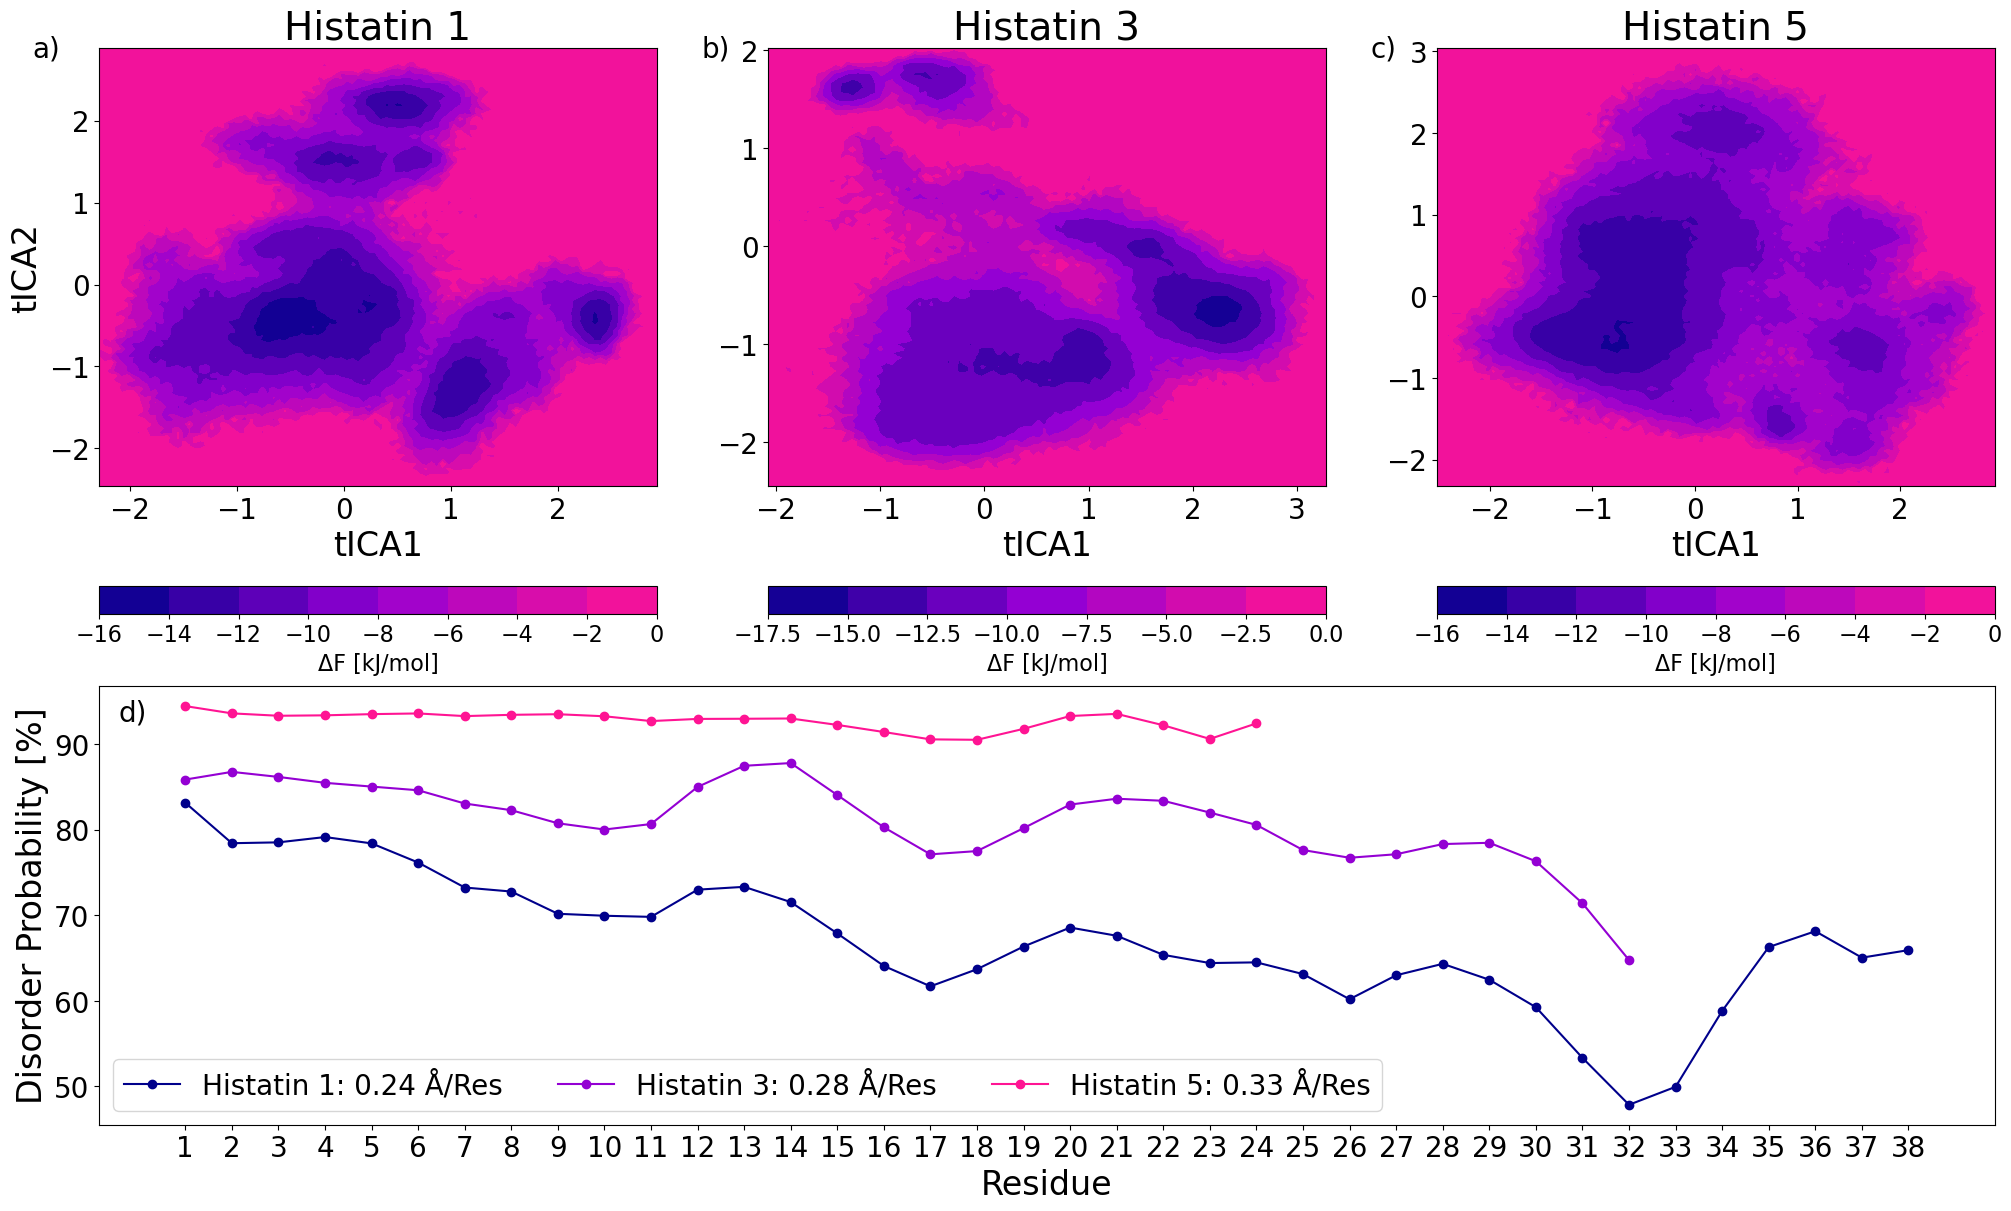

In [58]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper center', 'upper right'],
                               ['lower', 'lower', 'lower']], 
                              figsize=(20, 12), layout='constrained')

im = ax['upper left'].contourf(x1[0:-1], y1[0:-1], energy_1, cmap=cmap)
test = fig.colorbar(im, orientation='horizontal')
test.ax.tick_params(labelsize=16)
test.set_label('ΔF [kJ/mol]', fontsize=16)
im = ax['upper center'].contourf(x3[0:-1], y3[0:-1], energy_3, cmap=cmap)
test = fig.colorbar(im, orientation='horizontal')
test.ax.tick_params(labelsize=16)
test.set_label('ΔF [kJ/mol]', fontsize=16)
im = ax['upper right'].contourf(x5[0:-1], y5[0:-1], energy_5, cmap=cmap)
test = fig.colorbar(im, orientation='horizontal')
test.ax.tick_params(labelsize=16)
test.set_label('ΔF [kJ/mol]', fontsize=16)

ax['upper left'].set_yticks(range(-2, 3, 1))
ax['upper center'].set_yticks(range(-2, 3, 1))
ax['upper left'].set_xlabel('tICA1', fontsize=24)
ax['upper center'].set_xlabel('tICA1', fontsize=24)
ax['upper right'].set_xlabel('tICA1', fontsize=24)
ax['upper left'].set_ylabel('tICA2', fontsize=24)
ax['upper left'].set_title('Histatin 1', fontsize=28)
ax['upper center'].set_title('Histatin 3', fontsize=28)
ax['upper right'].set_title('Histatin 5', fontsize=28)
ax['upper left'].tick_params(labelsize=20)
ax['upper center'].tick_params(labelsize=20)
ax['upper right'].tick_params(labelsize=20)

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst1.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax['lower'].plot(a, c*100, color='darkblue', marker='o')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst3.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax['lower'].plot(a, c*100, color='darkviolet', marker='o')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/disorder/Hst5.dat'
a, b, c = np.genfromtxt(file, usecols=(0, 1, 2), unpack=True)
ax['lower'].plot(a, c*100, color='deeppink', marker='o')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
npho = sum(b)/len(b)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
hst3 = sum(b)/len(b)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/gyrate-taf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=27)
hst5 = sum(b)/len(b)

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/38 )
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/32 )
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/rmsf.xvg'
a, b = np.genfromtxt(file, usecols=(0, 1), unpack=True, skip_header=17)
print( ((sum(b)/len(b))*10)/24  )

ax['lower'].set_xticks(range(1, 39, 1))
ax['lower'].set_xlabel('Residue', fontsize=24)
ax['lower'].set_ylabel('Disorder Probability [%]', fontsize=24)
ax['lower'].tick_params(labelsize=20)
ax['lower'].legend(['Histatin 1: 0.24 Å/Res', 'Histatin 3: 0.28 Å/Res', 'Histatin 5: 0.33 Å/Res'], 
          loc='lower left', ncols=3, fontsize=20)

ax['upper left'].text(-0.12,0.98,"a)",fontsize=20,transform=ax['upper left'].transAxes)
ax['upper center'].text(-0.12,0.98,"b)",fontsize=20,transform=ax['upper center'].transAxes)
ax['upper right'].text(-0.12,0.98,"c)",fontsize=20,transform=ax['upper right'].transAxes)
ax['lower'].text(0.01,0.92,"d)",fontsize=20,transform=ax['lower'].transAxes)

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Free_energy_Hsts.png', bbox_inches='tight')

## Phopso-induced SS

In [81]:
 with open ((path + str(counter) + '.dat'), 'r') as dssp_file: 
            DSSP = dssp_file.readlines()
            for line in DSSP:
                for letter in line:
                    if letter == 'G': # 3-10-helix
                        SS_array[counter, 5] += 1
                    elif letter == 'E': # Beta-ladder
                        SS_array[counter, 6] += 1
                    elif letter == 'B': # Beta-bridge
                        SS_array[counter, 7] += 1
                    elif letter == 'H': #Alfa-helix
                        SS_array[counter, 8] += 1

FileNotFoundError: [Errno 2] No such file or directory: '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/PS_H5/38.dat'

In [82]:
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
Alfa_helix1 = []
Beta_bridge1 = []
Beta_ladder1 = []
Nr_helix1 = []
with open(path + 'dssp_pho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        AH = 0
        BB = 0
        BL = 0
        NH = 0
        for letter in line:
            if letter == 'H':
                AH += 1
            elif letter == 'B':
                BB += 1
            elif letter == 'E':
                BL += 1
            elif letter == 'G':
                NH += 1
        Alfa_helix1.append((AH/38)*100)
        Beta_bridge1.append((BB/38)*100)
        Beta_ladder1.append((BL/38)*100)
        Nr_helix1.append((NH/38)*100)

In [83]:
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
Alfa_helix2 = []
Beta_bridge2 = []
Beta_ladder2 = []
Nr_helix2 = []
with open(path + 'dssp_npho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        AH = 0
        BB = 0
        BL = 0
        NH = 0
        for letter in line:
            if letter == 'H':
                AH += 1
            elif letter == 'B':
                BB += 1
            elif letter == 'E':
                BL += 1
            elif letter == 'G':
                NH += 1
        Alfa_helix2.append((AH/38)*100)
        Beta_bridge2.append((BB/38)*100)
        Beta_ladder2.append((BL/38)*100)
        Nr_helix2.append((NH/38)*100)

In [84]:
e1 = np.genfromtxt((path + '/polystat_pho.xvg'), unpack=True, skip_header=27, usecols=(1))
e2 = np.genfromtxt((path + '/polystat_npho.xvg'), unpack=True, skip_header=27, usecols=(1))

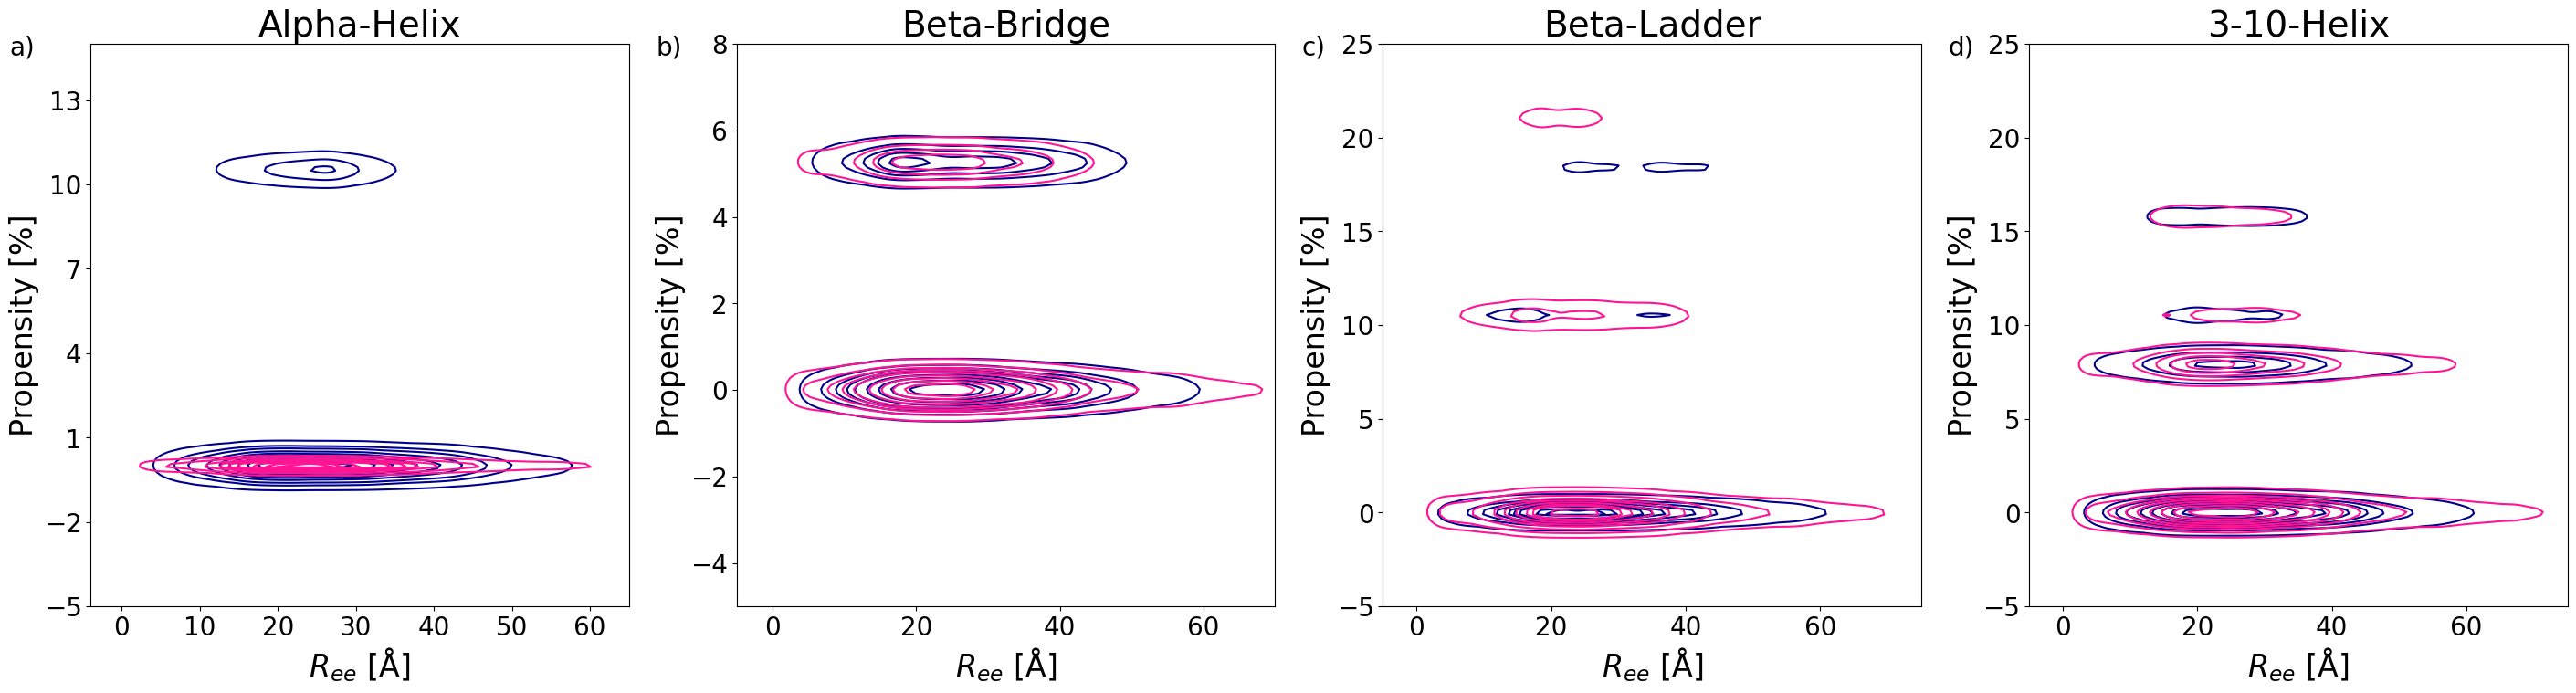

In [86]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize=(35, 8))
dataset = pd.DataFrame({'$R_{ee}$ [Å]': e1[0:-1]*10, 'Propensity': Alfa_helix1})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[0], color='darkblue')
dataset = pd.DataFrame({'$R_{ee}$ [Å]': e2[0:-1]*10, 'Propensity': Alfa_helix2})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[0], color='deeppink')

dataset = pd.DataFrame({'$R_{ee}$ [Å]': e1[0:-1]*10, 'Propensity': Beta_bridge1})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[1], color='darkblue')
dataset = pd.DataFrame({'$R_{ee}$ [Å]': e2[0:-1]*10, 'Propensity': Beta_bridge2})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[1], color='deeppink')

dataset = pd.DataFrame({'$R_{ee}$ [Å]': e1[0:-1]*10, 'Propensity': Beta_ladder1})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[2], color='darkblue')
dataset = pd.DataFrame({'$R_{ee}$ [Å]': e2[0:-1]*10, 'Propensity': Beta_ladder2})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[2], color='deeppink')

dataset = pd.DataFrame({'$R_{ee}$ [Å]': e1[0:-1]*10, 'Propensity': Nr_helix1})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[3], color='darkblue', label='Phosporylated')
dataset = pd.DataFrame({'$R_{ee}$ [Å]': e2[0:-1]*10, 'Propensity': Nr_helix2})
im = sns.kdeplot(data=dataset, x='$R_{ee}$ [Å]', y='Propensity', ax=ax[3], color='deeppink', label='Non-phosporylated')

ax[0].set_xlim(-4, 65)
ax[1].set_xlim(-5, 70)
ax[2].set_xlim(-5, 75)
ax[3].set_xlim(-5, 75)
ax[0].set_ylim(-5, 15)
ax[1].set_ylim(-5, 8)
ax[2].set_ylim(-5, 25)
ax[3].set_ylim(-5, 25)             
ax[0].set_title('Alpha-Helix', fontsize=28)
ax[1].set_title('Beta-Bridge', fontsize=28)
ax[2].set_title('Beta-Ladder', fontsize=28)
ax[3].set_title('3-10-Helix', fontsize=28)
ax[0].set_xlabel('$R_{ee}$ [Å]', fontsize=24)
ax[1].set_xlabel('$R_{ee}$ [Å]', fontsize=24)
ax[2].set_xlabel('$R_{ee}$ [Å]', fontsize=24)
ax[3].set_xlabel('$R_{ee}$ [Å]', fontsize=24)
ax[0].set_ylabel('Propensity [%]', fontsize=24)
ax[1].set_ylabel('Propensity [%]', fontsize=24)
ax[2].set_ylabel('Propensity [%]', fontsize=24)
ax[3].set_ylabel('Propensity [%]', fontsize=24)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[2].tick_params(labelsize=20)
ax[3].tick_params(labelsize=20)
ax[0].set_yticks(range(-5, 15, 3))
ax[0].text(-0.15,0.98,"a)",fontsize=20,transform=ax[0].transAxes)
ax[1].text(-0.15,0.98,"b)",fontsize=20,transform=ax[1].transAxes)
ax[2].text(-0.15,0.98,"c)",fontsize=20,transform=ax[2].transAxes)
ax[3].text(-0.15,0.98,"d)",fontsize=20,transform=ax[3].transAxes)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/KDE_dssp.png', bbox_inches='tight')

In [87]:
pho = np.zeros((1, 38))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
with open(path + 'dssp_pho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        counter = 0
        for letter in line:
            if letter == 'H':
                pho[0, counter] += 1
            counter += 1
pho = pho/sum(pho[0])
            
npho = np.zeros((1, 38))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
with open(path + 'dssp_npho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        counter = 0
        for letter in line:
            if letter == 'H':
                npho[0, counter] += 1
            counter += 1
npho = npho/sum(npho[0])

bpho = np.zeros((1, 38))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
with open(path + 'dssp_pho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        counter = 0
        for letter in line:
            if letter == 'E':
                bpho[0, counter] += 1
            counter += 1
bpho = bpho/sum(bpho[0])
            
bnpho = np.zeros((1, 38))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/EE_SS/'
with open(path + 'dssp_npho.dat', 'r') as file:
    dssp = file.readlines()
    for line in dssp:
        counter = 0
        for letter in line:
            if letter == 'E':
                bnpho[0, counter] += 1
            counter += 1
bnpho = bnpho/sum(bnpho[0])

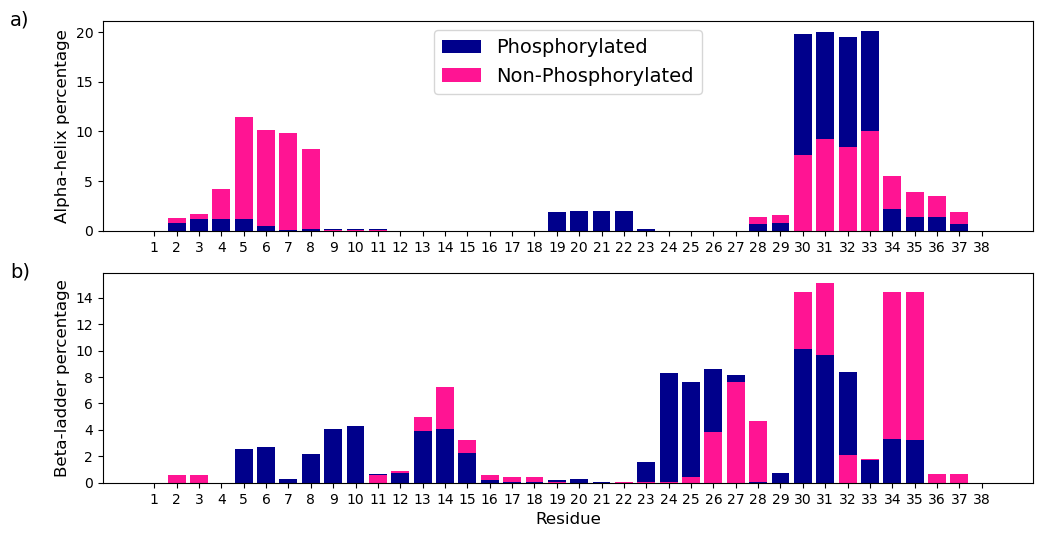

In [88]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 6))
res = range(1, 39, 1)
counter = 0
for (i, j) in zip(pho[0], npho[0]):
    if i < j:
        ax[0].bar(res[counter], j*100, color='deeppink')
        ax[0].bar(res[counter], i*100, color='darkblue')
    else:
        ax[0].bar(res[counter], i*100, color='darkblue')
        ax[0].bar(res[counter], j*100, color='deeppink')
    counter += 1
res = range(1, 39, 1)
counter = 0
for (i, j) in zip(bpho[0], bnpho[0]):
    if i < j:
        ax[1].bar(res[counter], j*100, color='deeppink')
        ax[1].bar(res[counter], i*100, color='darkblue')
    else:
        ax[1].bar(res[counter], i*100, color='darkblue')
        ax[1].bar(res[counter], j*100, color='deeppink')
    counter += 1

ax[0].set_xticks(res)
ax[1].set_xticks(res)
ax[1].set_xlabel('Residue', fontsize=12)
ax[0].set_ylabel('Alpha-helix percentage', fontsize=12)
ax[1].set_ylabel('Beta-ladder percentage', fontsize=12)
ax[1].set_yticks(range(0, 16, 2))
ax[0].text(-0.1,0.98,"a)",fontsize=14,transform=ax[0].transAxes)
ax[1].text(-0.1,0.98,"b)",fontsize=14,transform=ax[1].transAxes)
ax[0].legend([ 'Phosphorylated', 'Non-Phosphorylated'], 
          ncols=1, loc='upper center', fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Alfa_helix_phospo', bbox_inches='tight')